### Setup packages 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=1dca4326e13c07971ca57ae6730e271fb0a265067255ac02062a42df7cac5140
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 127 µs (started: 2022-07-15 08:43:16 +00:00)


In [3]:
from plotnine import *
from plotnine.themes import *

time: 1.67 s (started: 2022-07-15 08:43:16 +00:00)


In [4]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp
from tqdm import tqdm

time: 2.88 s (started: 2022-07-15 08:43:18 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [5]:
paper_name = "dgm_hjb"

time: 828 µs (started: 2022-07-15 08:43:20 +00:00)


In [6]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

#make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 9.58 ms (started: 2022-07-15 08:43:20 +00:00)


In [7]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 9.33 ms (started: 2022-07-15 08:43:20 +00:00)


In [8]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb
from torch.utils.data import DataLoader


time: 2.24 s (started: 2022-07-15 08:43:20 +00:00)


In [9]:
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint as pp

time: 2.53 s (started: 2022-07-15 08:43:23 +00:00)


### Shared functions across models

In [10]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 28.1 ms (started: 2022-07-15 08:43:57 +00:00)


In [11]:
# plot_report(train)
# plot_activation_mean(train)

time: 903 µs (started: 2022-07-15 08:43:58 +00:00)


In [12]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()

time: 1.2 ms (started: 2022-07-15 08:43:58 +00:00)


In [13]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 39.7 ms (started: 2022-07-15 08:43:58 +00:00)


In [14]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 179 ms (started: 2022-07-15 08:43:58 +00:00)


In [15]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 8.91 ms (started: 2022-07-15 08:43:58 +00:00)


In [16]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 11.9 ms (started: 2022-07-15 08:43:58 +00:00)


In [17]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 4.86 ms (started: 2022-07-15 08:43:58 +00:00)


In [18]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 2.8 ms (started: 2022-07-15 08:43:58 +00:00)


In [20]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 34.7 ms (started: 2022-07-15 08:43:58 +00:00)


### Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

##### Closed form terminal utility functions

In [21]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1):
  return(-1*torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1):
  return(-np.exp(-gamma_discount*x))

from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))

time: 2.92 ms (started: 2022-07-15 08:44:02 +00:00)


#### MertonUtilityNet

In [22]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.neurons = NN
        self.depth = NL
        self.Input = 5  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act(self.fc_input(x))
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 18.3 ms (started: 2022-07-15 08:44:04 +00:00)


#### MertonPiNet

In [23]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out
        

time: 18.7 ms (started: 2022-07-15 08:44:05 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [24]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.neurons=neurons
        self.depth=depth

        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)


time: 94.9 ms (started: 2022-07-15 08:44:06 +00:00)


#### MertonMatchPiNet

[Matching Paper by hand](https://arxiv.org/abs/1912.01455v3)

In [25]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 29.7 ms (started: 2022-07-15 08:44:09 +00:00)


#### PiEquation

In [26]:
class PiEquation():

    def __init__(self, pi_net, du_dx, d2u_dx2, curr_epoch=0):
        self.pi_net = pi_net
        self.grads = du_dx, d2u_dx2
        self.curr_epoch = curr_epoch

        #self.gamma = 0.0001
        #seld.du_dx = Variable(du_dx, requires_grad=False)
        #self.d2u_dx2 = Variable(d2u_dx2, requires_grad=False)

    def criterion(self, x_internal, grads):
      
      #du_dx = Variable(grads[1], requires_grad=False)   # the derivatives with respect to u are held constant when finding pi 
      #d2u_dx2 = Variable(grads[2], requires_grad=False) # du_dt is grads[0], not relevant here
      du_dx, d2u_dx2 = grads

      #print('gradient shapes:', du_dx.shape, d2u_dx2.shape)

      pi_net_preds = self.pi_net(x_internal)
      pi_net_preds = pi_net_preds.reshape(-1,1)
      #print('pi_net prediction shape:', pi_net_preds.shape)
      
      intC = None
      #  time, wealth, mu, r, sigma
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        
        # pi * (mu-r)
        loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1))
        #print('loss1 shape:', loss_1.shape)
        
        # r * wealth
        loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)
        #print('loss2 shape:', loss_2.shape)
        
        # sigma^2 * pi^2
        loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
        #print('loss3 shape:', loss_3.shape)
        
        intC_loss = -(loss_1 +loss_2)*du_dx - 0.5*loss_3*d2u_dx2
        #print('total internal loss shape:', intC_loss.shape)

      return intC_loss

    def calculatePiLoss(self, x_internal, grads, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        #x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal, grads)
        
        if not keep_batch:          
          return torch.mean(Ls)           
        else:
          return Ls

time: 25 ms (started: 2022-07-15 08:44:11 +00:00)


#### TrainInternalPiWithDGM


In [37]:
class TrainInternalPiWithDGM():
    
    def __init__(self, u_equation, pi_equation, BATCH_SIZE, epoch, lr, debug = False, loss_multiply = 1.0):
        self.BATCH_SIZE = BATCH_SIZE
        self.u_model = u_equation        
        self.pi_model = pi_equation
        
        self.debug = debug  
        self.hook_interval = 100    
        
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.pi_model.pi_net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.early_stop_counter = 0

        self.stop_epoch = 0

        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        

        self.epoch = epoch
        self.lr = lr

        #self.loss_multiply = loss_multiply

        self.print = False

        
    def train(self , eqLossFn = 'calculatePiLoss', sample_method_X = "U", sample_batch = None):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((self.epoch, 3 ), dtype='float32') * np.nan
        
        #self.train_losses = np.ones((self.epoch, 1 ), dtype='float32') * np.nan

        # set it to train mode
        self.pi_model.pi_net.train()
        
        optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        if self.u_model.pi_optim_state is not None:
            optimizer.load_state_dict(self.u_model.pi_optim_state)  ## check 
        
        #if self.u_model.pi_optim_state is None:
        #    optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        #else:
        #    optimizer = self.u_model.pi_optim_state


        loss_avg = 0.0
        loss_calc_method = None
        
        try:
            loss_calc_method = getattr(self.pi_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.pi_model.__class__.__name__, eqLossFn))
        
        if sample_batch is None:
            sample_batch = self.u_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

        x_internal, _ = sample_batch

        for e in range(self.epoch):

            optimizer.zero_grad()
  

            loss  = 1e4 * loss_calc_method(x_internal, self.pi_model.grads, keep_batch = False )            

            if self.print:
              print(f"Pi Net Epoch {e} Loss {round(loss.item(),5)}")
            
            #self.train_losses[e,:] = [ to_cpu_detach(loss) ]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=0.5) ], 
            #                                                                                         keep_batch = False )
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
            #  self.validation_losses[e,:] = validation_loss_list
            #
            #if self.use_early_stop:
            #  loss_to_check = loss
            #  if loss_to_check < (self.best_loss-self.early_stop_delta):
            #    self.best_loss = loss_to_check
            #    self.early_stop_counter = 0
            #  else:
            #    self.early_stop_counter += 1
            #  if self.early_stop_counter>=self.early_stop_patience:
            #    # print(f"Pi Early Stop at epoch {e}: {loss_to_check} with patience {self.early_stop_patience}")
            #    break
            
            
            loss_avg = loss_avg + float(loss.item())

            # print('self.epoch:', e)
            loss.backward()
            # for param in self.pi_model.pi_net.parameters():
            #   print('pi grad', param.grad)
            optimizer.step()
            
            #if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
            if (self.pi_model.curr_epoch % self.hook_interval == (self.hook_interval-1)) and e==0:

                loss_avg = loss_avg/self.hook_interval
                #print("Unet Epoch {} - Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, e , self.lr , loss_avg))
                # print("Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, self.lr , loss_avg))
                loss_avg = 0.0
        
        self.u_model.pi_optim_state = optimizer.state_dict()
        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)


time: 90 ms (started: 2022-07-15 09:07:50 +00:00)


#### MertonEquation

In [47]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth, gamma_discount=1)):

        self.u_net = u_net
        self.pi_net = pi_net

        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 0.5
        self.MIN_SIGMA = 0.2

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        #self.loss_multiply = 1.0

        #self.FORCE_MU = None
        #self.FORCE_R = None
        #self.FORCE_SIGMA = None

        self.epoch_of_u = None
        self.adapt_pi_epochs = False
        self.start_adapt_epochs = [ [500, 1000, 2000, 5000, 10000, 15000 ], [4, 8, 10 ,20, 40, 60] ]
        self.was_loss_beaten = False
        self.pi_optim_state = None

        #self.pi_net.train()

        self.gamma = 1.0
        self.beta = 1.0
        self.weights = None

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size):
      mu_candidate = self.MAX_MU * torch.rand([size, 1])
      r_candidate = mu_candidate * torch.rand([size, 1])  # ensuring that r is lower than mu
      return mu_candidate, r_candidate

      # r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      # mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      # return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            #range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size)
            sigma_sample_internal =  self.MIN_SIGMA + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( (1 - torch.rand([size,1])) * self.T, # time to maturity
                                                    self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size)
            sigma_sample_terminal =  self.MIN_SIGMA + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1), # time to maturity
                                                   self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      internal_strata_xts = []
      terminal_strata_xts = []
      
      if sample_method_X in ["U"]:
          range_multiplier = 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]

          total_strat_processed = 0

          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):
              
            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)

              range_multiplier = 1.0

              ### internal samples of Time, Wealth, Mu, R, Sigma
              internal_stratum_t_sample = tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])
              internal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_internal, stratum_r_sample_internal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal)
              x_internal_stratum = self.to_device(torch.cat(( internal_stratum_t_sample , # Time
                                                              internal_stratum_x_sample, # Wealth
                                                              stratum_mu_sample_internal, # mu
                                                              stratum_r_sample_internal, # R
                                                               # Sigma
                                                            ) , dim = 1 ),to_cpu)
              if not internal_strata_xts: 
                internal_strata_xts = [ x_internal_stratum ] 
              else:
                internal_strata_xts.append(x_internal_stratum) 

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_terminal, stratum_r_sample_terminal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal)
              x_terminal_stratum = self.to_device(torch.cat(( torch.zeros(num_samples_in_stratum, 1) + self.T , # Time
                                                      terminal_stratum_x_sample, # Wealth
                                                      stratum_mu_sample_terminal, # mu
                                                      stratum_r_sample_terminal, # R
                                                      stratum_sigma_sample_terminal # Sigma
                                                    ) , dim = 1 ),to_cpu)
              if not terminal_strata_xts:
                terminal_strata_xts = [ x_terminal_stratum ] # terminal_stratum_xt[None,:,:]
              else:
                terminal_strata_xts.append(x_terminal_stratum) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

              total_strat_processed += 1 
              # print((len(internal_strata_xts),xbreaks_used[stratum_x_count],tbreaks_used[stratum_t_count]))

          # pdb.set_trace()
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def get_num_pi_epochs(self):
      if self.adapt_pi_epochs and self.was_loss_beaten:
       if any([ i < self.epoch_of_u for i in self.start_adapt_epochs[0] ]):
         return self.pi_net_epoch * self.start_adapt_epochs[1][[i for i in range(len(self.start_adapt_epochs[0])) if self.start_adapt_epochs[0][i] < self.epoch_of_u][-1]] 
      
      return self.pi_net_epoch

    def get_utility_function_derivatives(self, u_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( u_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(u_net_val),
                                  create_graph=True)
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(du_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dx),
                                      create_graph=True, allow_unused=True
                                      )[0][:,1].reshape(-1,1)
        
        return du_dt, du_dx, d2u_dx2
    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

        
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def dHdx(self, x, gamma=1):
        
        return self.Htx(x) * (-1 * gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1)))

    
    def d2Hdx2(self, x, gamma=1):
        
        return self.Htx(x) * gamma**2 * torch.exp(2* x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))


    def criterion(self, x_internal, x_terminal, loss_transforms = [torch.square], util_network=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()
        
        u_net_val = util_network(x_internal)
        #print(torch.mean(u_net_val), torch.min(u_net_val), torch.max(u_net_val))

        
        # Trying to used a correct solution to see Pi convergence
        #u_net_val = self.Htx(x_internal)
        #du_dx, d2u_dx2 = self.dHdx(x_internal), self.d2Hdx2(x_internal)
        #du_dt = torch.zeros_like(du_dx)


        du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(u_net_val, x_internal)
        #print('Unet derivatives shape:', du_dt.shape, du_dx.shape, d2u_dx2.shape)


        pi_model = PiEquation(self.pi_net, du_dx.detach(), d2u_dx2.detach())
        pi_model.curr_epoch = self.epoch_of_u              
        
        pi_trainer = TrainInternalPiWithDGM(self, pi_model, 
                                            x_internal.shape[0], 
                                            self.get_num_pi_epochs(), 
                                            self.pi_net_lr, 
                                            debug=True, 
                                            loss_multiply=1.0)
        #pi_trainer.use_early_stop = True
        #pi_trainer.early_stop_patience = min(20,math.ceil(self.pi_net_epoch/10.0))
        
        pi_trainer.train(sample_batch=(x_internal, x_terminal))
        

        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          
          pi_net_preds = self.pi_net(x_internal)
          #pi_net_preds = (x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) / (x_internal[:,4].reshape(-1,1) ** 2) * (du_dx / d2u_dx2)
          
          pi_net_preds = pi_net_preds.detach().reshape(-1,1)
          #print('Pi net prediction inside Unet:', pi_net_preds.shape)

          # pi*(mu-r)
          intC_loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) 
          #print('interim loss1 in unet shape:', intC_loss_1.shape)
          
          # r * wealth
          intC_loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)  
          #print('interim loss2 in unet shape:', intC_loss_2.shape)
          
          # sigma^2 * pi^2
          intC_loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
          #print('interim loss3 in unet shape:', intC_loss_3.shape)
          
          # it is minus in front of time derivative as it is time to maturity instead of elapsed time
          intC_loss = -du_dt + (intC_loss_1 + intC_loss_2)*du_dx + 0.5*intC_loss_3*d2u_dx2
          
          #print(torch.mean(intC_loss), torch.min(intC_loss), torch.max(intC_loss))
          #print('interim total loss in unet shape:', intC_loss.shape)

          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 
        
        
        #print('Terminal condition shapes:')
        #print(self.g(x_terminal).shape)
        #print(util_network(x_terminal).shape)

        terC = [ loss_transform(self.g(x_terminal) - util_network(x_terminal)) for loss_transform in loss_transforms ]
        
        # print('mean d2u_dx2:', d2u_dx2.mean(),'max d2u_dx2:', d2u_dx2.max())
        # print('mean du_dx:', du_dx.mean(),'max du_dx:', d2u_dx2.max())
        # print('mean du_dt:', du_dt.mean(),'max d2u_dx2:', d2u_dx2.max())
        
        return intC, terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        
        #x_terminal = Variable( x_terminal , requires_grad=True)
        # print('MertonEquation calling self.criterion')
        Ls = self.criterion(x_internal , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC, terC = Ls

        return_losses = []
        # print('internal Loss', torch.mean(intC[0]))
        # print('external Loss', torch.mean(terC[0]))

        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc])
            return_losses.append( [ 1e4 * loss_equalWeightedByType , 
                                    1e4 * torch.mean(intC[lc]) , 
                                    1e4 * torch.mean(terC[lc])
                                   ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms, util_network=util_network)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ 1e4 * transformed_loss , 
                                    1e4 * torch.mean(intC[lc]) , 
                                    1e4 * torch.mean(terC[lc]),
                                    1e4 * loss_equalWeightedByType ] )            
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ 1e4 * transformed_loss , 
                                    1e4 * 0.5*torch.mean(intC[lc]) , 
                                    1e4 * 0.5*torch.mean(terC[lc]) ] )      
            # ,1e4 * loss_equalWeightedByType      
        return return_losses

    

time: 1.18 s (started: 2022-07-15 09:29:58 +00:00)


#### Save info from run

In [77]:
def save_model_final(training, eqObject, lr, eqLossFn, sample_method, batch_size): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_base_str}_P")

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "gamma" : eqObject.gamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        # "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 29.7 ms (started: 2022-07-15 17:49:41 +00:00)


In [30]:
def save_model_train(training, eqObject, lr, eqLossFn, sample_method, loss, batch_size, epoch): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}_{str(torch.round(loss,decimals=2)).replace('.','p')}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_P")

  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(training, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{training.hook_interval}_{model_id_base_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                         "use_early_stop" : training.use_early_stop,
                        "early_stop_patience" : training.early_stop_patience,
                        "early_stop_delta" : training.early_stop_delta,
                        "monitored_loss_type" : training.monitored_loss_type,
                        "use_early_stop" : training.use_early_stop,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "gamma" : eqObject.gamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        # "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 37.4 ms (started: 2022-07-15 08:44:21 +00:00)


#### TrainHJBMertonWithDGM

In [31]:
class TrainHJBMertonWithDGM():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        
        #self.history_mean_hooks = [] 
        #self.history_surfaces_hooks = None       
        #self.history_tl = []
        #self.history_internal = []
        #self.history_terminal = []
        #self.history_initial = []              
        #self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.monitored_loss_type = "Train_L2"
        #self.early_stop_counter = 0
        self.stop_epoch = 0
        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        
        
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        #self.train_losses = np.ones((epoch, 3 ), dtype='float32') * np.nan
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        #self.model.adapt_pi_epochs = True

        # self.epoch_of_u = None
        # self.adapt_pi_epochs = False
        # self.start_adapt_epochs = [ [500, 1000, 2000, 5000 ], [4, 8, 10 ,20] ]
        # self.was_loss_beaten = False


        #full_dataset = self.model.sample(sample_method_X = sample_method_X, size=100000)
        #full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
        #full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

            #batch_size_used = self.BATCH_SIZE
            #if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
            #  batch_size_used = self.BATCH_SIZE*20
            #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=batch_size_used)

                optimizer.zero_grad()

                self.model.epoch_of_u = e
                losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
                
                # pdb.set_trace()
                loss, internal, terminal = losses_L2[0]

            #    self.train_losses[e,:] = [ to_cpu_detach(loss), to_cpu_detach(internal), to_cpu_detach(terminal)]
            #                           to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs), 
            #                           to_cpu_detach(losses_equalWeightedByType_abs)]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
            #                                                                                         keep_batch = False,
            #                                                                                         util_network =self.net)
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
            #  self.validation_losses[e,:] = validation_loss_list
              # pdb.set_trace()
              # print(f"Epoch {e} - Pi Pred (0.47) {self.model.pi_net(self.validation_sample[0]).item()}")

            
            #if self.use_early_stop or self.model.adapt_pi_epochs:
            #  loss_to_check = losses_equalWeightedByType
            #  if self.monitored_loss_type == "Train_L2":
            #    pass
            #  elif self.monitored_loss_type == "Train_L1":             
            #    loss_to_check = losses_equalWeightedByType_abs
            #  elif self.monitored_loss_type == "Train_MAXL2":             
            #    loss_to_check = max_loss_L2

            #  if loss_to_check < (self.best_loss-self.early_stop_delta):
            #    self.best_loss = loss_to_check
            #    if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
            #      self.model.was_loss_beaten = False  # this was an increased batch for longer run, so we discount the loss here
            #      if self.model.adapt_pi_epochs and e>(self.model.start_adapt_epochs[0][0]):
            #        save_model_train(self, self.model, lr, eqLossFn, sample_method, self.best_loss, batch_size_used, e)  # but we still store it
            #    else:
            #      self.model.was_loss_beaten = True
            #    self.early_stop_counter = 0
            #    # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
            #  else:
            #    self.early_stop_counter += 1
            #    self.model.was_loss_beaten = False
            #  if self.early_stop_counter>=self.early_stop_patience and self.use_early_stop:
            #    print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
            #    break
            
            
                loss_avg = loss_avg + float(loss.item())
                loss_int_avg = loss_int_avg + float(internal.item())
                loss.backward()

                optimizer.step()
                # scheduler.step(loss.item())
                # scheduler.step()
                i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
                
                #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
                #x_internal , x_terminal = sample_batch
                
                # pdb.set_trace()
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print(f"Epoch {e} - lr {lr} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print('internal loss:', internal , 'terminal loss:', terminal)

                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))


                # plot the fitted value function vs the closed form (ideally straight line...)
                #u_internal_sample = x_internal.clone()
                #mask = (u_internal_sample[:,0] > 0.1) & (u_internal_sample[:,4] > 0.1)
                #u_internal_sample = u_internal_sample[mask.reshape(-1),:]
                
                #gamma = 1
                #time = u_internal_sample[:,0].cpu().detach()
                #wealth = u_internal_sample[:,1].cpu().detach()
                #mu = u_internal_sample[:,2].cpu().detach()
                #r = u_internal_sample[:,3].cpu().detach()
                #sigma = u_internal_sample[:,4].cpu().detach()
                
                #u_internal_sample = Variable(u_internal_sample, requires_grad=True)
                #unet_preds = self.net(u_internal_sample)
                #du_dt, du_dx, d2u_dx2 = self.model.get_utility_function_derivatives(unet_preds, u_internal_sample)
                
                #pi_pred_example = self.model.pi_net(u_internal_sample.detach())
                
                #print('mean pi', pi_pred_example.mean(), 'max pi', pi_pred_example.max(), 'min pi', pi_pred_example.min())
                #print('mean d2u_dx2:', d2u_dx2.mean(),'max abs d2u_dx2:', torch.abs(d2u_dx2).max(), 'min abs d2u_dx2:', torch.abs(d2u_dx2).min())
                #print('mean du_dx:', du_dx.mean(),'max abs du_dx:', torch.abs(du_dx).max(), 'min abs du_dx:', torch.abs(du_dx).min())
                #print('mean du_dt:', du_dt.mean(),'max abs d2u_dx2:', torch.abs(du_dt).max(), 'min abs d2u_dx2:', torch.abs(du_dt).min())

                #u_net_results = unet_preds.detach().cpu().numpy().reshape(-1).tolist()
                #htx_results = self.Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
                #dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
                
                #print(ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point())
                
                #dataf = pd.DataFrame( { 'pi_net': self.model.pi_net(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                #       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )

                #print(ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point())
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                #self.history_tl.append( loss_avg )
                #self.history_internal.append( internal )
                #self.history_terminal.append( terminal )
                
                #if self.debug == True and (self.validation_sample is not None):
                #    mean = []
                #    for l in self.hooks:
                #        mean.append(torch.mean( self.hooks[l] ).item())
                #    self.history_mean_hooks.append( mean )
                #    xinternal, xterminal = self.validation_sample
                #    xinternal_before, xinternal_expanded = attach_pi_used(xinternal, self.model.pi_net, requires_grad=False)
                #    xterminal_before, xterminal_expanded = attach_pi_used(xterminal, self.model.pi_net, requires_grad=False)

                #    xinternal_res = self.model.u_net(xinternal_expanded).detach()
                #    xterminal_res = self.model.u_net(xterminal_expanded).detach()

                    # pdb.set_trace()
                #    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                #    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                #    if self.history_surfaces_hooks is None:
                #      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                #    else:
                #      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 3*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1), dtype='float32') * np.nan
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count])  

              # pdb.set_trace()
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method(sample_batch, 
                                                                       loss_transforms = [ key_loss_func, torch.abs ], 
                                                                       keep_batch = False )
              # if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
              #   pdb.set_trace()
              #   pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs ,losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                print('internal loss:', internal , 'terminal loss:', terminal)
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e


time: 745 ms (started: 2022-07-15 08:44:22 +00:00)


### Test Case

#### Display functions

In [38]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.detach().reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1), requires_grad=requires_grad)
  return before_x, new_x

time: 3.13 ms (started: 2022-07-15 09:08:07 +00:00)


In [39]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

time: 2.66 ms (started: 2022-07-15 09:08:07 +00:00)


#### Without Imp Sampling (gamma)

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-3
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net.to(torch.device("cuda:0"))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
#mequation.adapt_pi_epochs = True

trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc.hook_interval = 100

trainMertonAlloc.train(epoch = 10000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

  0%|          | 3/10000 [00:00<17:30,  9.52it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 13933.87109375 - Internal Loss: 2817.01123046875 - Terminal Loss: 11116.85986328125


  1%|          | 101/10000 [00:08<19:28,  8.47it/s]

Pi Epoch 99 - lr 0.001 -  key loss: -3.205796203613281
Unet Epoch 99 - lr 0.001 - Total Loss: 2181.1533203125 - Internal Loss: 951.0242309570312 - Terminal Loss: 1230.1290893554688


  2%|▏         | 201/10000 [00:16<11:36, 14.07it/s]

Pi Epoch 199 - lr 0.001 -  key loss: -13.456109619140625
Unet Epoch 199 - lr 0.001 - Total Loss: 1914.7247314453125 - Internal Loss: 614.4495849609375 - Terminal Loss: 1300.275146484375


  3%|▎         | 301/10000 [00:23<12:18, 13.13it/s]

Pi Epoch 299 - lr 0.001 -  key loss: 9.813714599609375
Unet Epoch 299 - lr 0.001 - Total Loss: 3222.200927734375 - Internal Loss: 1896.8358154296875 - Terminal Loss: 1325.3651123046875


  4%|▍         | 401/10000 [00:31<11:52, 13.48it/s]

Pi Epoch 399 - lr 0.001 -  key loss: 12.798675537109375
Unet Epoch 399 - lr 0.001 - Total Loss: 3652.85986328125 - Internal Loss: 2289.590576171875 - Terminal Loss: 1363.269287109375


  5%|▌         | 500/10000 [00:40<28:42,  5.52it/s]

Pi Epoch 499 - lr 0.001 -  key loss: -1.0021412658691407
Unet Epoch 499 - lr 0.001 - Total Loss: 2171.034912109375 - Internal Loss: 732.2848510742188 - Terminal Loss: 1438.7500610351562


  6%|▌         | 601/10000 [00:49<12:40, 12.35it/s]

Pi Epoch 599 - lr 0.001 -  key loss: 5.28500732421875
Unet Epoch 599 - lr 0.001 - Total Loss: 2269.14990234375 - Internal Loss: 819.3346557617188 - Terminal Loss: 1449.8152465820312


  7%|▋         | 701/10000 [00:57<13:20, 11.62it/s]

Pi Epoch 699 - lr 0.001 -  key loss: -0.6023529815673828
Unet Epoch 699 - lr 0.001 - Total Loss: 1543.9581298828125 - Internal Loss: 53.05230712890625 - Terminal Loss: 1490.9058227539062


  8%|▊         | 801/10000 [01:06<13:13, 11.59it/s]

Pi Epoch 799 - lr 0.001 -  key loss: -0.9002922058105469
Unet Epoch 799 - lr 0.001 - Total Loss: 1470.5050048828125 - Internal Loss: 82.66683959960938 - Terminal Loss: 1387.8381652832031


  9%|▉         | 901/10000 [01:15<17:38,  8.60it/s]

Pi Epoch 899 - lr 0.001 -  key loss: -1.5423512268066406
Unet Epoch 899 - lr 0.001 - Total Loss: 1379.136474609375 - Internal Loss: 138.44537353515625 - Terminal Loss: 1240.6911010742188


 10%|█         | 1000/10000 [01:25<13:50, 10.84it/s]

Pi Epoch 999 - lr 0.001 -  key loss: -3.041260070800781
Unet Epoch 999 - lr 0.001 - Total Loss: 1169.5665283203125 - Internal Loss: 267.8263244628906 - Terminal Loss: 901.7402038574219


 11%|█         | 1100/10000 [01:35<14:34, 10.18it/s]

Pi Epoch 1099 - lr 0.001 -  key loss: -3.5189495849609376
Unet Epoch 1099 - lr 0.001 - Total Loss: 404.7385559082031 - Internal Loss: 281.4953308105469 - Terminal Loss: 123.24322509765625


 12%|█▏        | 1201/10000 [01:46<15:14,  9.62it/s]

Pi Epoch 1199 - lr 0.001 -  key loss: -2.5704449462890624
Unet Epoch 1199 - lr 0.001 - Total Loss: 154.58970642089844 - Internal Loss: 129.0392303466797 - Terminal Loss: 25.55047607421875


 13%|█▎        | 1301/10000 [01:57<16:02,  9.04it/s]

Pi Epoch 1299 - lr 0.001 -  key loss: -2.3279573059082033
Unet Epoch 1299 - lr 0.001 - Total Loss: 136.5900421142578 - Internal Loss: 104.81723022460938 - Terminal Loss: 31.772811889648438


 14%|█▍        | 1401/10000 [02:08<16:18,  8.79it/s]

Pi Epoch 1399 - lr 0.001 -  key loss: -2.363788299560547
Unet Epoch 1399 - lr 0.001 - Total Loss: 155.30406188964844 - Internal Loss: 98.68482208251953 - Terminal Loss: 56.619239807128906


 15%|█▌        | 1501/10000 [02:19<16:25,  8.62it/s]

Pi Epoch 1499 - lr 0.001 -  key loss: -2.2790768432617186
Unet Epoch 1499 - lr 0.001 - Total Loss: 124.04631042480469 - Internal Loss: 93.07666015625 - Terminal Loss: 30.969650268554688


 16%|█▌        | 1600/10000 [02:32<16:55,  8.28it/s]

Pi Epoch 1599 - lr 0.001 -  key loss: -2.3996826171875
Unet Epoch 1599 - lr 0.001 - Total Loss: 143.3179473876953 - Internal Loss: 92.96620178222656 - Terminal Loss: 50.35174560546875


 17%|█▋        | 1700/10000 [02:44<16:27,  8.40it/s]

Pi Epoch 1699 - lr 0.001 -  key loss: -2.2069383239746094
Unet Epoch 1699 - lr 0.001 - Total Loss: 160.99737548828125 - Internal Loss: 80.8113784790039 - Terminal Loss: 80.18599700927734


 18%|█▊        | 1800/10000 [02:57<17:24,  7.85it/s]

Pi Epoch 1799 - lr 0.001 -  key loss: -2.2894769287109376
Unet Epoch 1799 - lr 0.001 - Total Loss: 255.010498046875 - Internal Loss: 82.86400604248047 - Terminal Loss: 172.14649200439453


 19%|█▉        | 1900/10000 [03:10<25:05,  5.38it/s]

Pi Epoch 1899 - lr 0.001 -  key loss: -2.304840850830078
Unet Epoch 1899 - lr 0.001 - Total Loss: 175.15122985839844 - Internal Loss: 83.2705307006836 - Terminal Loss: 91.88069915771484


 20%|██        | 2000/10000 [03:24<17:59,  7.41it/s]

Pi Epoch 1999 - lr 0.001 -  key loss: -2.3325135803222654
Unet Epoch 1999 - lr 0.001 - Total Loss: 140.30252075195312 - Internal Loss: 82.89290618896484 - Terminal Loss: 57.40961456298828


 21%|██        | 2100/10000 [03:38<18:07,  7.26it/s]

Pi Epoch 2099 - lr 0.001 -  key loss: -2.2503315734863283
Unet Epoch 2099 - lr 0.001 - Total Loss: 381.8222961425781 - Internal Loss: 80.29440307617188 - Terminal Loss: 301.52789306640625


 22%|██▏       | 2200/10000 [03:53<20:50,  6.24it/s]

Pi Epoch 2199 - lr 0.001 -  key loss: -2.2878822326660155
Unet Epoch 2199 - lr 0.001 - Total Loss: 171.2700958251953 - Internal Loss: 76.84453582763672 - Terminal Loss: 94.4255599975586


 23%|██▎       | 2300/10000 [04:08<19:07,  6.71it/s]

Pi Epoch 2299 - lr 0.001 -  key loss: -2.324640808105469
Unet Epoch 2299 - lr 0.001 - Total Loss: 191.9663848876953 - Internal Loss: 80.42786407470703 - Terminal Loss: 111.53852081298828


 24%|██▍       | 2400/10000 [04:23<19:51,  6.38it/s]

Pi Epoch 2399 - lr 0.001 -  key loss: -2.2639158630371092
Unet Epoch 2399 - lr 0.001 - Total Loss: 173.0143280029297 - Internal Loss: 76.674072265625 - Terminal Loss: 96.34025573730469


 25%|██▌       | 2500/10000 [04:40<27:54,  4.48it/s]

Pi Epoch 2499 - lr 0.001 -  key loss: -2.3237533569335938
Unet Epoch 2499 - lr 0.001 - Total Loss: 137.81727600097656 - Internal Loss: 75.84874725341797 - Terminal Loss: 61.968528747558594


 26%|██▌       | 2600/10000 [04:56<19:43,  6.25it/s]

Pi Epoch 2599 - lr 0.001 -  key loss: -2.2202189636230467
Unet Epoch 2599 - lr 0.001 - Total Loss: 112.62338256835938 - Internal Loss: 75.17498016357422 - Terminal Loss: 37.448402404785156


 27%|██▋       | 2700/10000 [05:12<19:32,  6.23it/s]

Pi Epoch 2699 - lr 0.001 -  key loss: -2.192487945556641
Unet Epoch 2699 - lr 0.001 - Total Loss: 200.7093048095703 - Internal Loss: 73.0911865234375 - Terminal Loss: 127.61811828613281


 28%|██▊       | 2800/10000 [05:29<19:42,  6.09it/s]

Pi Epoch 2799 - lr 0.001 -  key loss: -2.2467877197265627
Unet Epoch 2799 - lr 0.001 - Total Loss: 106.7643814086914 - Internal Loss: 79.14019012451172 - Terminal Loss: 27.624191284179688


 29%|██▉       | 2900/10000 [05:46<19:59,  5.92it/s]

Pi Epoch 2899 - lr 0.001 -  key loss: -2.1679263305664063
Unet Epoch 2899 - lr 0.001 - Total Loss: 161.3377227783203 - Internal Loss: 69.41211700439453 - Terminal Loss: 91.92560577392578


 30%|███       | 3000/10000 [06:04<21:32,  5.42it/s]

Pi Epoch 2999 - lr 0.001 -  key loss: -2.2092826843261717
Unet Epoch 2999 - lr 0.001 - Total Loss: 192.12197875976562 - Internal Loss: 71.36063385009766 - Terminal Loss: 120.76134490966797


 31%|███       | 3100/10000 [06:23<21:02,  5.46it/s]

Pi Epoch 3099 - lr 0.001 -  key loss: -2.2209544372558594
Unet Epoch 3099 - lr 0.001 - Total Loss: 257.75634765625 - Internal Loss: 72.17626190185547 - Terminal Loss: 185.58008575439453


 32%|███▏      | 3200/10000 [06:43<21:43,  5.22it/s]

Pi Epoch 3199 - lr 0.001 -  key loss: -2.2726431274414063
Unet Epoch 3199 - lr 0.001 - Total Loss: 285.4309997558594 - Internal Loss: 74.42969512939453 - Terminal Loss: 211.00130462646484


 33%|███▎      | 3300/10000 [07:03<20:16,  5.51it/s]

Pi Epoch 3299 - lr 0.001 -  key loss: -2.2547453308105467
Unet Epoch 3299 - lr 0.001 - Total Loss: 118.33954620361328 - Internal Loss: 73.43934631347656 - Terminal Loss: 44.90019989013672


 34%|███▍      | 3400/10000 [07:22<20:47,  5.29it/s]

Pi Epoch 3399 - lr 0.001 -  key loss: -2.2552244567871096
Unet Epoch 3399 - lr 0.001 - Total Loss: 180.76829528808594 - Internal Loss: 72.11580657958984 - Terminal Loss: 108.6524887084961


 35%|███▌      | 3500/10000 [07:42<22:38,  4.78it/s]

Pi Epoch 3499 - lr 0.001 -  key loss: -2.1709051513671875
Unet Epoch 3499 - lr 0.001 - Total Loss: 307.3193359375 - Internal Loss: 63.62834548950195 - Terminal Loss: 243.69099044799805


 36%|███▌      | 3600/10000 [08:02<21:03,  5.07it/s]

Pi Epoch 3599 - lr 0.001 -  key loss: -2.1529425048828124
Unet Epoch 3599 - lr 0.001 - Total Loss: 227.50662231445312 - Internal Loss: 66.42158508300781 - Terminal Loss: 161.0850372314453


 37%|███▋      | 3700/10000 [08:23<21:25,  4.90it/s]

Pi Epoch 3699 - lr 0.001 -  key loss: -2.1615553283691407
Unet Epoch 3699 - lr 0.001 - Total Loss: 292.6652526855469 - Internal Loss: 64.82069396972656 - Terminal Loss: 227.8445587158203


 38%|███▊      | 3800/10000 [08:54<21:04,  4.90it/s]

Pi Epoch 3799 - lr 0.001 -  key loss: -2.127344512939453
Unet Epoch 3799 - lr 0.001 - Total Loss: 101.52252197265625 - Internal Loss: 63.12757873535156 - Terminal Loss: 38.39494323730469


 39%|███▉      | 3900/10000 [09:20<21:54,  4.64it/s]

Pi Epoch 3899 - lr 0.001 -  key loss: -2.07135009765625
Unet Epoch 3899 - lr 0.001 - Total Loss: 106.3967514038086 - Internal Loss: 62.19869613647461 - Terminal Loss: 44.198055267333984


 40%|████      | 4000/10000 [09:45<24:24,  4.10it/s]

Pi Epoch 3999 - lr 0.001 -  key loss: -2.146081848144531
Unet Epoch 3999 - lr 0.001 - Total Loss: 147.97463989257812 - Internal Loss: 67.97374725341797 - Terminal Loss: 80.00089263916016


 41%|████      | 4099/10000 [10:11<40:41,  2.42it/s]

Pi Epoch 4099 - lr 0.001 -  key loss: -2.1286161804199217


 41%|████      | 4100/10000 [10:11<40:54,  2.40it/s]

Unet Epoch 4099 - lr 0.001 - Total Loss: 147.11376953125 - Internal Loss: 60.192264556884766 - Terminal Loss: 86.92150497436523


 42%|████▏     | 4200/10000 [10:35<21:49,  4.43it/s]

Pi Epoch 4199 - lr 0.001 -  key loss: -2.12170166015625
Unet Epoch 4199 - lr 0.001 - Total Loss: 102.71394348144531 - Internal Loss: 62.316410064697266 - Terminal Loss: 40.39753341674805


 43%|████▎     | 4300/10000 [10:59<22:43,  4.18it/s]

Pi Epoch 4299 - lr 0.001 -  key loss: -2.196450500488281
Unet Epoch 4299 - lr 0.001 - Total Loss: 199.50411987304688 - Internal Loss: 64.76922607421875 - Terminal Loss: 134.73489379882812


 44%|████▍     | 4400/10000 [11:22<27:57,  3.34it/s]

Pi Epoch 4399 - lr 0.001 -  key loss: -2.0829733276367186
Unet Epoch 4399 - lr 0.001 - Total Loss: 272.897216796875 - Internal Loss: 57.351112365722656 - Terminal Loss: 215.54610443115234


 45%|████▍     | 4499/10000 [11:47<39:43,  2.31it/s]

Pi Epoch 4499 - lr 0.001 -  key loss: -2.075251007080078


 45%|████▌     | 4500/10000 [11:48<40:26,  2.27it/s]

Unet Epoch 4499 - lr 0.001 - Total Loss: 140.24844360351562 - Internal Loss: 58.037513732910156 - Terminal Loss: 82.21092987060547


 46%|████▌     | 4599/10000 [12:22<25:45,  3.49it/s]

Pi Epoch 4599 - lr 0.001 -  key loss: -2.18729736328125


 46%|████▌     | 4600/10000 [12:22<26:15,  3.43it/s]

Unet Epoch 4599 - lr 0.001 - Total Loss: 279.7506103515625 - Internal Loss: 61.451011657714844 - Terminal Loss: 218.29959869384766


 47%|████▋     | 4699/10000 [12:57<35:21,  2.50it/s]

Pi Epoch 4699 - lr 0.001 -  key loss: -2.1286944580078124


 47%|████▋     | 4700/10000 [12:57<33:20,  2.65it/s]

Unet Epoch 4699 - lr 0.001 - Total Loss: 97.9035873413086 - Internal Loss: 59.003604888916016 - Terminal Loss: 38.89998245239258


 48%|████▊     | 4800/10000 [13:30<21:37,  4.01it/s]

Pi Epoch 4799 - lr 0.001 -  key loss: -2.135102081298828
Unet Epoch 4799 - lr 0.001 - Total Loss: 164.5299530029297 - Internal Loss: 59.49086380004883 - Terminal Loss: 105.03908920288086


 49%|████▉     | 4900/10000 [14:05<23:37,  3.60it/s]

Pi Epoch 4899 - lr 0.001 -  key loss: -2.1130741882324218
Unet Epoch 4899 - lr 0.001 - Total Loss: 101.4351806640625 - Internal Loss: 60.84404373168945 - Terminal Loss: 40.59113693237305


 50%|████▉     | 4999/10000 [14:34<24:57,  3.34it/s]

Pi Epoch 4999 - lr 0.001 -  key loss: -2.1431732177734375


 50%|█████     | 5000/10000 [14:34<25:01,  3.33it/s]

Unet Epoch 4999 - lr 0.001 - Total Loss: 112.88520050048828 - Internal Loss: 63.840843200683594 - Terminal Loss: 49.04435729980469


 51%|█████     | 5099/10000 [15:14<33:01,  2.47it/s]

Pi Epoch 5099 - lr 0.001 -  key loss: -2.078009033203125


 51%|█████     | 5100/10000 [15:15<34:47,  2.35it/s]

Unet Epoch 5099 - lr 0.001 - Total Loss: 105.8297348022461 - Internal Loss: 54.21323776245117 - Terminal Loss: 51.61649703979492


 52%|█████▏    | 5200/10000 [15:50<21:28,  3.73it/s]

Pi Epoch 5199 - lr 0.001 -  key loss: -2.1732212829589845
Unet Epoch 5199 - lr 0.001 - Total Loss: 94.06322479248047 - Internal Loss: 61.1747932434082 - Terminal Loss: 32.888431549072266


 53%|█████▎    | 5299/10000 [16:22<26:59,  2.90it/s]

Pi Epoch 5299 - lr 0.001 -  key loss: -2.036704559326172


 53%|█████▎    | 5300/10000 [16:22<25:54,  3.02it/s]

Unet Epoch 5299 - lr 0.001 - Total Loss: 264.8271484375 - Internal Loss: 51.07016372680664 - Terminal Loss: 213.75698471069336


 54%|█████▍    | 5400/10000 [16:54<20:44,  3.70it/s]

Pi Epoch 5399 - lr 0.001 -  key loss: -2.0474053955078126
Unet Epoch 5399 - lr 0.001 - Total Loss: 125.66983032226562 - Internal Loss: 54.465354919433594 - Terminal Loss: 71.20447540283203


 55%|█████▍    | 5499/10000 [17:25<25:31,  2.94it/s]

Pi Epoch 5499 - lr 0.001 -  key loss: -2.0769052124023437


 55%|█████▌    | 5500/10000 [17:26<26:04,  2.88it/s]

Unet Epoch 5499 - lr 0.001 - Total Loss: 106.92842102050781 - Internal Loss: 55.73087692260742 - Terminal Loss: 51.19754409790039


 56%|█████▌    | 5600/10000 [18:00<21:31,  3.41it/s]

Pi Epoch 5599 - lr 0.001 -  key loss: -2.101789093017578
Unet Epoch 5599 - lr 0.001 - Total Loss: 146.38751220703125 - Internal Loss: 64.27320098876953 - Terminal Loss: 82.11431121826172


 57%|█████▋    | 5699/10000 [18:30<26:09,  2.74it/s]

Pi Epoch 5699 - lr 0.001 -  key loss: -2.0892869567871095


 57%|█████▋    | 5700/10000 [18:30<25:09,  2.85it/s]

Unet Epoch 5699 - lr 0.001 - Total Loss: 79.05738067626953 - Internal Loss: 55.45344543457031 - Terminal Loss: 23.60393524169922


 58%|█████▊    | 5799/10000 [19:03<43:20,  1.62it/s]

Pi Epoch 5799 - lr 0.001 -  key loss: -2.162857666015625


 58%|█████▊    | 5800/10000 [19:03<42:16,  1.66it/s]

Unet Epoch 5799 - lr 0.001 - Total Loss: 71.32275390625 - Internal Loss: 53.233558654785156 - Terminal Loss: 18.089195251464844


 59%|█████▉    | 5900/10000 [19:33<19:00,  3.60it/s]

Pi Epoch 5899 - lr 0.001 -  key loss: -2.053916778564453
Unet Epoch 5899 - lr 0.001 - Total Loss: 101.01983642578125 - Internal Loss: 53.86679458618164 - Terminal Loss: 47.15304183959961


 60%|██████    | 6000/10000 [20:03<19:20,  3.45it/s]

Pi Epoch 5999 - lr 0.001 -  key loss: -2.1024020385742186
Unet Epoch 5999 - lr 0.001 - Total Loss: 104.10575103759766 - Internal Loss: 51.68405532836914 - Terminal Loss: 52.421695709228516


 61%|██████    | 6099/10000 [20:34<20:29,  3.17it/s]

Pi Epoch 6099 - lr 0.001 -  key loss: -2.1067779541015623


 61%|██████    | 6100/10000 [20:34<24:44,  2.63it/s]

Unet Epoch 6099 - lr 0.001 - Total Loss: 165.3996124267578 - Internal Loss: 65.92534637451172 - Terminal Loss: 99.4742660522461


 62%|██████▏   | 6199/10000 [21:05<19:20,  3.28it/s]

Pi Epoch 6199 - lr 0.001 -  key loss: -2.176799468994141


 62%|██████▏   | 6200/10000 [21:05<19:19,  3.28it/s]

Unet Epoch 6199 - lr 0.001 - Total Loss: 104.64224243164062 - Internal Loss: 53.919837951660156 - Terminal Loss: 50.72240447998047


 63%|██████▎   | 6300/10000 [21:36<18:07,  3.40it/s]

Pi Epoch 6299 - lr 0.001 -  key loss: -2.1956443786621094
Unet Epoch 6299 - lr 0.001 - Total Loss: 98.84049987792969 - Internal Loss: 59.53467559814453 - Terminal Loss: 39.305824279785156


 64%|██████▍   | 6399/10000 [22:07<18:10,  3.30it/s]

Pi Epoch 6399 - lr 0.001 -  key loss: -2.087723388671875


 64%|██████▍   | 6400/10000 [22:08<18:25,  3.26it/s]

Unet Epoch 6399 - lr 0.001 - Total Loss: 103.2158203125 - Internal Loss: 53.56874465942383 - Terminal Loss: 49.64707565307617


 65%|██████▍   | 6499/10000 [22:42<19:35,  2.98it/s]

Pi Epoch 6499 - lr 0.001 -  key loss: -2.2442947387695313


 65%|██████▌   | 6500/10000 [22:42<19:46,  2.95it/s]

Unet Epoch 6499 - lr 0.001 - Total Loss: 126.75117492675781 - Internal Loss: 56.067928314208984 - Terminal Loss: 70.68324661254883


 66%|██████▌   | 6599/10000 [23:15<18:52,  3.00it/s]

Pi Epoch 6599 - lr 0.001 -  key loss: -2.124270477294922


 66%|██████▌   | 6600/10000 [23:15<18:33,  3.05it/s]

Unet Epoch 6599 - lr 0.001 - Total Loss: 150.13690185546875 - Internal Loss: 62.340415954589844 - Terminal Loss: 87.7964859008789


 67%|██████▋   | 6699/10000 [23:47<17:10,  3.20it/s]

Pi Epoch 6699 - lr 0.001 -  key loss: -2.135204162597656


 67%|██████▋   | 6700/10000 [23:47<17:16,  3.19it/s]

Unet Epoch 6699 - lr 0.001 - Total Loss: 119.29592895507812 - Internal Loss: 48.011661529541016 - Terminal Loss: 71.28426742553711


 68%|██████▊   | 6799/10000 [24:19<18:14,  2.93it/s]

Pi Epoch 6799 - lr 0.001 -  key loss: -2.1085643005371093


 68%|██████▊   | 6800/10000 [24:20<18:12,  2.93it/s]

Unet Epoch 6799 - lr 0.001 - Total Loss: 161.7316131591797 - Internal Loss: 54.31278610229492 - Terminal Loss: 107.41882705688477


 69%|██████▉   | 6899/10000 [24:55<18:05,  2.86it/s]

Pi Epoch 6899 - lr 0.001 -  key loss: -2.080866394042969


 69%|██████▉   | 6900/10000 [24:55<18:20,  2.82it/s]

Unet Epoch 6899 - lr 0.001 - Total Loss: 135.75595092773438 - Internal Loss: 52.42488479614258 - Terminal Loss: 83.3310661315918


 70%|██████▉   | 6999/10000 [25:31<17:38,  2.83it/s]

Pi Epoch 6999 - lr 0.001 -  key loss: -1.9811412048339845


 70%|███████   | 7000/10000 [25:31<17:18,  2.89it/s]

Unet Epoch 6999 - lr 0.001 - Total Loss: 148.91688537597656 - Internal Loss: 46.32585144042969 - Terminal Loss: 102.59103393554688


 71%|███████   | 7099/10000 [26:06<16:48,  2.88it/s]

Pi Epoch 7099 - lr 0.001 -  key loss: -2.0838504028320313


 71%|███████   | 7100/10000 [26:06<16:40,  2.90it/s]

Unet Epoch 7099 - lr 0.001 - Total Loss: 122.5364761352539 - Internal Loss: 53.9313850402832 - Terminal Loss: 68.6050910949707


 72%|███████▏  | 7199/10000 [26:50<15:47,  2.96it/s]

Pi Epoch 7199 - lr 0.001 -  key loss: -2.1712722778320312


 72%|███████▏  | 7200/10000 [26:50<15:50,  2.95it/s]

Unet Epoch 7199 - lr 0.001 - Total Loss: 92.6519546508789 - Internal Loss: 51.328826904296875 - Terminal Loss: 41.32312774658203


 73%|███████▎  | 7299/10000 [27:33<16:26,  2.74it/s]

Pi Epoch 7299 - lr 0.001 -  key loss: -2.1416172790527344


 73%|███████▎  | 7300/10000 [27:34<16:38,  2.70it/s]

Unet Epoch 7299 - lr 0.001 - Total Loss: 67.47454833984375 - Internal Loss: 49.06451416015625 - Terminal Loss: 18.4100341796875


 74%|███████▍  | 7399/10000 [28:21<21:03,  2.06it/s]

Pi Epoch 7399 - lr 0.001 -  key loss: -2.062094268798828


 74%|███████▍  | 7400/10000 [28:21<20:22,  2.13it/s]

Unet Epoch 7399 - lr 0.001 - Total Loss: 120.37063598632812 - Internal Loss: 53.293434143066406 - Terminal Loss: 67.07720184326172


 75%|███████▍  | 7499/10000 [29:03<17:29,  2.38it/s]

Pi Epoch 7499 - lr 0.001 -  key loss: -2.1386814880371094


 75%|███████▌  | 7500/10000 [29:03<17:55,  2.32it/s]

Unet Epoch 7499 - lr 0.001 - Total Loss: 80.47539520263672 - Internal Loss: 49.876708984375 - Terminal Loss: 30.59868621826172


 76%|███████▌  | 7599/10000 [29:48<17:55,  2.23it/s]

Pi Epoch 7599 - lr 0.001 -  key loss: -2.0054080200195314


 76%|███████▌  | 7600/10000 [29:48<17:49,  2.24it/s]

Unet Epoch 7599 - lr 0.001 - Total Loss: 107.47701263427734 - Internal Loss: 44.651451110839844 - Terminal Loss: 62.8255615234375


 77%|███████▋  | 7699/10000 [30:29<15:32,  2.47it/s]

Pi Epoch 7699 - lr 0.001 -  key loss: -2.1161781311035157


 77%|███████▋  | 7700/10000 [30:30<15:22,  2.49it/s]

Unet Epoch 7699 - lr 0.001 - Total Loss: 105.81842041015625 - Internal Loss: 58.04612731933594 - Terminal Loss: 47.77229309082031


 78%|███████▊  | 7799/10000 [31:26<19:41,  1.86it/s]

Pi Epoch 7799 - lr 0.001 -  key loss: -2.1069017028808594


 78%|███████▊  | 7800/10000 [31:27<18:51,  1.94it/s]

Unet Epoch 7799 - lr 0.001 - Total Loss: 101.0506820678711 - Internal Loss: 48.4789924621582 - Terminal Loss: 52.57168960571289


 79%|███████▉  | 7899/10000 [32:07<14:29,  2.42it/s]

Pi Epoch 7899 - lr 0.001 -  key loss: -2.042023468017578


 79%|███████▉  | 7900/10000 [32:07<14:36,  2.39it/s]

Unet Epoch 7899 - lr 0.001 - Total Loss: 85.64034271240234 - Internal Loss: 45.78170394897461 - Terminal Loss: 39.858638763427734


 80%|███████▉  | 7999/10000 [32:51<16:51,  1.98it/s]

Pi Epoch 7999 - lr 0.001 -  key loss: -2.056224060058594


 80%|████████  | 8000/10000 [32:51<16:53,  1.97it/s]

Unet Epoch 7999 - lr 0.001 - Total Loss: 142.77316284179688 - Internal Loss: 46.45997619628906 - Terminal Loss: 96.31318664550781


 81%|████████  | 8099/10000 [33:34<13:27,  2.35it/s]

Pi Epoch 8099 - lr 0.001 -  key loss: -2.088276672363281


 81%|████████  | 8100/10000 [33:34<13:29,  2.35it/s]

Unet Epoch 8099 - lr 0.001 - Total Loss: 72.28746795654297 - Internal Loss: 50.011192321777344 - Terminal Loss: 22.276275634765625


 82%|████████▏ | 8199/10000 [34:16<14:22,  2.09it/s]

Pi Epoch 8199 - lr 0.001 -  key loss: -2.184212188720703


 82%|████████▏ | 8200/10000 [34:17<14:25,  2.08it/s]

Unet Epoch 8199 - lr 0.001 - Total Loss: 166.87559509277344 - Internal Loss: 51.390708923339844 - Terminal Loss: 115.4848861694336


 83%|████████▎ | 8299/10000 [35:00<11:34,  2.45it/s]

Pi Epoch 8299 - lr 0.001 -  key loss: -2.2185255432128907


 83%|████████▎ | 8300/10000 [35:00<11:27,  2.47it/s]

Unet Epoch 8299 - lr 0.001 - Total Loss: 78.40640258789062 - Internal Loss: 53.191837310791016 - Terminal Loss: 25.21456527709961


 84%|████████▍ | 8399/10000 [35:42<11:12,  2.38it/s]

Pi Epoch 8399 - lr 0.001 -  key loss: -2.128729248046875


 84%|████████▍ | 8400/10000 [35:42<11:19,  2.36it/s]

Unet Epoch 8399 - lr 0.001 - Total Loss: 69.84119415283203 - Internal Loss: 47.487586975097656 - Terminal Loss: 22.353607177734375


 85%|████████▍ | 8499/10000 [36:26<10:25,  2.40it/s]

Pi Epoch 8499 - lr 0.001 -  key loss: -2.0926109313964845


 85%|████████▌ | 8500/10000 [36:27<10:43,  2.33it/s]

Unet Epoch 8499 - lr 0.001 - Total Loss: 114.11837005615234 - Internal Loss: 48.104759216308594 - Terminal Loss: 66.01361083984375


 86%|████████▌ | 8599/10000 [37:20<11:55,  1.96it/s]

Pi Epoch 8599 - lr 0.001 -  key loss: -2.0859634399414064


 86%|████████▌ | 8600/10000 [37:21<11:30,  2.03it/s]

Unet Epoch 8599 - lr 0.001 - Total Loss: 85.88215637207031 - Internal Loss: 62.29658126831055 - Terminal Loss: 23.585575103759766


 87%|████████▋ | 8699/10000 [38:12<10:03,  2.15it/s]

Pi Epoch 8699 - lr 0.001 -  key loss: -2.1650498962402343


 87%|████████▋ | 8700/10000 [38:12<10:07,  2.14it/s]

Unet Epoch 8699 - lr 0.001 - Total Loss: 144.77975463867188 - Internal Loss: 46.07550811767578 - Terminal Loss: 98.7042465209961


 88%|████████▊ | 8799/10000 [38:58<08:45,  2.29it/s]

Pi Epoch 8799 - lr 0.001 -  key loss: -2.033855743408203


 88%|████████▊ | 8800/10000 [38:59<09:26,  2.12it/s]

Unet Epoch 8799 - lr 0.001 - Total Loss: 106.4681625366211 - Internal Loss: 47.07827377319336 - Terminal Loss: 59.389888763427734


 89%|████████▉ | 8899/10000 [39:47<08:50,  2.07it/s]

Pi Epoch 8899 - lr 0.001 -  key loss: -2.047678985595703


 89%|████████▉ | 8900/10000 [39:48<08:55,  2.05it/s]

Unet Epoch 8899 - lr 0.001 - Total Loss: 111.86754608154297 - Internal Loss: 48.40884780883789 - Terminal Loss: 63.45869827270508


 90%|████████▉ | 8999/10000 [40:35<08:44,  1.91it/s]

Pi Epoch 8999 - lr 0.001 -  key loss: -2.086120147705078


 90%|█████████ | 9000/10000 [40:36<08:33,  1.95it/s]

Unet Epoch 8999 - lr 0.001 - Total Loss: 110.1222152709961 - Internal Loss: 57.0631217956543 - Terminal Loss: 53.0590934753418


 91%|█████████ | 9099/10000 [41:23<07:05,  2.12it/s]

Pi Epoch 9099 - lr 0.001 -  key loss: -2.090118103027344


 91%|█████████ | 9100/10000 [41:24<07:07,  2.11it/s]

Unet Epoch 9099 - lr 0.001 - Total Loss: 98.86200714111328 - Internal Loss: 52.8988151550293 - Terminal Loss: 45.963191986083984


 92%|█████████▏| 9199/10000 [42:13<06:50,  1.95it/s]

Pi Epoch 9199 - lr 0.001 -  key loss: -2.0547007751464843


 92%|█████████▏| 9200/10000 [42:13<06:33,  2.03it/s]

Unet Epoch 9199 - lr 0.001 - Total Loss: 70.53348541259766 - Internal Loss: 44.87283706665039 - Terminal Loss: 25.660648345947266


 93%|█████████▎| 9299/10000 [43:01<05:37,  2.08it/s]

Pi Epoch 9299 - lr 0.001 -  key loss: -2.0912416076660154


 93%|█████████▎| 9300/10000 [43:02<05:30,  2.12it/s]

Unet Epoch 9299 - lr 0.001 - Total Loss: 146.3136444091797 - Internal Loss: 56.293701171875 - Terminal Loss: 90.01994323730469


 94%|█████████▍| 9399/10000 [43:50<05:49,  1.72it/s]

Pi Epoch 9399 - lr 0.001 -  key loss: -2.1746702575683594


 94%|█████████▍| 9400/10000 [43:50<05:43,  1.75it/s]

Unet Epoch 9399 - lr 0.001 - Total Loss: 117.99855041503906 - Internal Loss: 47.95832443237305 - Terminal Loss: 70.04022598266602


 95%|█████████▍| 9499/10000 [44:43<04:16,  1.96it/s]

Pi Epoch 9499 - lr 0.001 -  key loss: -2.0238059997558593


 95%|█████████▌| 9500/10000 [44:44<04:13,  1.97it/s]

Unet Epoch 9499 - lr 0.001 - Total Loss: 93.20630645751953 - Internal Loss: 40.8359260559082 - Terminal Loss: 52.37038040161133


 96%|█████████▌| 9599/10000 [45:34<03:27,  1.94it/s]

Pi Epoch 9599 - lr 0.001 -  key loss: -2.032294921875


 96%|█████████▌| 9600/10000 [45:35<03:28,  1.92it/s]

Unet Epoch 9599 - lr 0.001 - Total Loss: 75.04550170898438 - Internal Loss: 45.56454086303711 - Terminal Loss: 29.480960845947266


 97%|█████████▋| 9699/10000 [46:25<02:32,  1.97it/s]

Pi Epoch 9699 - lr 0.001 -  key loss: -2.0757009887695315


 97%|█████████▋| 9700/10000 [46:25<02:33,  1.96it/s]

Unet Epoch 9699 - lr 0.001 - Total Loss: 79.48847198486328 - Internal Loss: 45.54246520996094 - Terminal Loss: 33.946006774902344


 98%|█████████▊| 9799/10000 [47:16<01:56,  1.72it/s]

Pi Epoch 9799 - lr 0.001 -  key loss: -2.103126983642578


 98%|█████████▊| 9800/10000 [47:16<01:52,  1.78it/s]

Unet Epoch 9799 - lr 0.001 - Total Loss: 72.81192016601562 - Internal Loss: 41.61360168457031 - Terminal Loss: 31.198318481445312


 99%|█████████▉| 9899/10000 [48:04<00:48,  2.08it/s]

Pi Epoch 9899 - lr 0.001 -  key loss: -2.073438262939453


 99%|█████████▉| 9900/10000 [48:05<00:48,  2.08it/s]

Unet Epoch 9899 - lr 0.001 - Total Loss: 74.88068389892578 - Internal Loss: 48.867130279541016 - Terminal Loss: 26.013553619384766


100%|█████████▉| 9999/10000 [48:55<00:00,  2.11it/s]

Pi Epoch 9999 - lr 0.001 -  key loss: -2.0979144287109377


100%|██████████| 10000/10000 [48:55<00:00,  3.41it/s]

Unet Epoch 9999 - lr 0.001 - Total Loss: 114.88558959960938 - Internal Loss: 46.9707145690918 - Terminal Loss: 67.91487503051758
time: 49min 6s (started: 2022-07-12 09:37:36 +00:00)


List of params for successfull run



*   Loss = L1
*   Util Net + piNet: depth = 3, NN= 50
*   lr = 0.005
*   lr_for_pi = 0.002
*   max_pi_epochs = 5
*   trainMertonAlloc.use_early_stop = False
*   epoch = 6100
*   loss weights = 1\*intC + 1\*terminal







#### display Without Imp Results

In [35]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

NameError: ignored

time: 387 ms (started: 2022-07-15 09:07:32 +00:00)


In [36]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

NameError: ignored

time: 22.8 ms (started: 2022-07-15 09:07:32 +00:00)


In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

#### With Imp Sampling (gamma)

In [68]:
# calculateLossKLMinMaxGamma

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-4
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net_g = MertonUtilityNet(NL=2, NN=64)
u_net_g.to(torch.device("cuda:0")) 

pi_net_g = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net_g.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net_g, pi_net_g, max_pi_epochs, lr_for_pi)
mequation_g.gamma = 0.5
mequation_g.adapt_pi_epochs = True
mequation_g.start_adapt_epochs = [ [500, 1000, 1250, 1500, 2000, 2500 ], [4, 8, 10 ,20, 40, 60] ]

trainMertonAlloc_g = TrainHJBMertonWithDGM(u_net_g, mequation_g, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 200

trainMertonAlloc_g.train(epoch = 30000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)



  0%|          | 4/30000 [00:00<30:01, 16.65it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 7389.4833984375 - Internal Loss: 1371.3865966796875 - Terminal Loss: 6018.0968017578125


  1%|          | 202/30000 [00:13<33:58, 14.62it/s]

Unet Epoch 199 - lr 0.001 - Total Loss: 408.89459228515625 - Internal Loss: 284.2339172363281 - Terminal Loss: 124.66067504882812


  1%|▏         | 401/30000 [00:29<40:23, 12.21it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 284.8744201660156 - Internal Loss: 198.3738250732422 - Terminal Loss: 86.50059509277344


  2%|▏         | 601/30000 [00:46<42:47, 11.45it/s]

Unet Epoch 599 - lr 0.001 - Total Loss: 114.36602783203125 - Internal Loss: 54.823238372802734 - Terminal Loss: 59.542789459228516


  3%|▎         | 801/30000 [01:04<45:41, 10.65it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 232.67770385742188 - Internal Loss: 42.838233947753906 - Terminal Loss: 189.83946990966797


  3%|▎         | 1002/30000 [01:24<47:08, 10.25it/s]

Unet Epoch 999 - lr 0.001 - Total Loss: 111.19866943359375 - Internal Loss: 46.943355560302734 - Terminal Loss: 64.25531387329102


  4%|▍         | 1201/30000 [01:45<52:38,  9.12it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 117.7627944946289 - Internal Loss: 36.25722122192383 - Terminal Loss: 81.50557327270508


  5%|▍         | 1401/30000 [02:08<56:03,  8.50it/s]

Unet Epoch 1399 - lr 0.001 - Total Loss: 56.31379318237305 - Internal Loss: 35.541481018066406 - Terminal Loss: 20.77231216430664


  5%|▌         | 1601/30000 [02:33<59:21,  7.97it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 54.58766555786133 - Internal Loss: 34.966426849365234 - Terminal Loss: 19.621238708496094


  6%|▌         | 1801/30000 [03:02<1:02:39,  7.50it/s]

Unet Epoch 1799 - lr 0.001 - Total Loss: 63.39030456542969 - Internal Loss: 30.93584632873535 - Terminal Loss: 32.454458236694336


  7%|▋         | 2001/30000 [03:30<1:05:49,  7.09it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 57.20770263671875 - Internal Loss: 33.253108978271484 - Terminal Loss: 23.954593658447266


  7%|▋         | 2201/30000 [04:00<1:29:16,  5.19it/s]

Unet Epoch 2199 - lr 0.001 - Total Loss: 71.16278839111328 - Internal Loss: 33.40457534790039 - Terminal Loss: 37.75821304321289


  8%|▊         | 2401/30000 [04:32<1:11:29,  6.43it/s]

Unet Epoch 2399 - lr 0.001 - Total Loss: 62.967254638671875 - Internal Loss: 31.806821823120117 - Terminal Loss: 31.160432815551758


  9%|▊         | 2601/30000 [05:08<1:15:11,  6.07it/s]

Unet Epoch 2599 - lr 0.001 - Total Loss: 61.265472412109375 - Internal Loss: 36.8065185546875 - Terminal Loss: 24.458953857421875


  9%|▉         | 2801/30000 [05:43<1:16:08,  5.95it/s]

Unet Epoch 2799 - lr 0.001 - Total Loss: 77.12257385253906 - Internal Loss: 31.38320541381836 - Terminal Loss: 45.7393684387207


 10%|█         | 3001/30000 [06:20<1:23:57,  5.36it/s]

Unet Epoch 2999 - lr 0.001 - Total Loss: 55.32711410522461 - Internal Loss: 30.544858932495117 - Terminal Loss: 24.782255172729492


 11%|█         | 3200/30000 [07:00<1:28:28,  5.05it/s]

Unet Epoch 3199 - lr 0.001 - Total Loss: 74.48851013183594 - Internal Loss: 28.144596099853516 - Terminal Loss: 46.34391403198242


 11%|█▏        | 3401/30000 [07:42<1:25:10,  5.20it/s]

Unet Epoch 3399 - lr 0.001 - Total Loss: 66.23969268798828 - Internal Loss: 34.40597915649414 - Terminal Loss: 31.83371353149414


 12%|█▏        | 3601/30000 [08:23<1:29:46,  4.90it/s]

Unet Epoch 3599 - lr 0.001 - Total Loss: 71.79234313964844 - Internal Loss: 26.195262908935547 - Terminal Loss: 45.59708023071289


 13%|█▎        | 3800/30000 [09:08<1:38:03,  4.45it/s]

Unet Epoch 3799 - lr 0.001 - Total Loss: 66.66029357910156 - Internal Loss: 24.235628128051758 - Terminal Loss: 42.424665451049805


 13%|█▎        | 4000/30000 [09:55<1:42:58,  4.21it/s]

Unet Epoch 3999 - lr 0.001 - Total Loss: 69.92499542236328 - Internal Loss: 33.360755920410156 - Terminal Loss: 36.564239501953125


 14%|█▍        | 4200/30000 [10:42<1:43:31,  4.15it/s]

Unet Epoch 4199 - lr 0.001 - Total Loss: 37.63470458984375 - Internal Loss: 25.4964656829834 - Terminal Loss: 12.138238906860352


 15%|█▍        | 4400/30000 [11:32<1:41:55,  4.19it/s]

Unet Epoch 4399 - lr 0.001 - Total Loss: 85.82746887207031 - Internal Loss: 22.299793243408203 - Terminal Loss: 63.52767562866211


 15%|█▌        | 4600/30000 [12:23<1:43:22,  4.10it/s]

Unet Epoch 4599 - lr 0.001 - Total Loss: 40.84228515625 - Internal Loss: 24.996562957763672 - Terminal Loss: 15.845722198486328


 16%|█▌        | 4800/30000 [13:17<1:47:26,  3.91it/s]

Unet Epoch 4799 - lr 0.001 - Total Loss: 37.00169372558594 - Internal Loss: 22.519245147705078 - Terminal Loss: 14.48244857788086


 17%|█▋        | 5000/30000 [14:12<1:52:10,  3.71it/s]

Unet Epoch 4999 - lr 0.001 - Total Loss: 68.38063049316406 - Internal Loss: 23.130708694458008 - Terminal Loss: 45.249921798706055


 17%|█▋        | 5200/30000 [15:11<1:57:09,  3.53it/s]

Unet Epoch 5199 - lr 0.001 - Total Loss: 49.2728271484375 - Internal Loss: 23.430652618408203 - Terminal Loss: 25.842174530029297


 18%|█▊        | 5400/30000 [16:09<2:02:43,  3.34it/s]

Unet Epoch 5399 - lr 0.001 - Total Loss: 74.93744659423828 - Internal Loss: 19.82870101928711 - Terminal Loss: 55.10874557495117


 19%|█▊        | 5600/30000 [17:14<2:03:29,  3.29it/s]

Unet Epoch 5599 - lr 0.001 - Total Loss: 42.3507194519043 - Internal Loss: 20.76410484313965 - Terminal Loss: 21.58661460876465


 19%|█▉        | 5800/30000 [18:19<2:12:31,  3.04it/s]

Unet Epoch 5799 - lr 0.001 - Total Loss: 66.37751770019531 - Internal Loss: 22.008174896240234 - Terminal Loss: 44.36934280395508


 20%|██        | 6000/30000 [19:27<2:18:46,  2.88it/s]

Unet Epoch 5999 - lr 0.001 - Total Loss: 81.00296020507812 - Internal Loss: 26.686111450195312 - Terminal Loss: 54.31684875488281


 21%|██        | 6200/30000 [20:39<2:35:03,  2.56it/s]

Unet Epoch 6199 - lr 0.001 - Total Loss: 33.543575286865234 - Internal Loss: 19.77196502685547 - Terminal Loss: 13.771610260009766


 21%|██▏       | 6400/30000 [21:54<2:30:13,  2.62it/s]

Unet Epoch 6399 - lr 0.001 - Total Loss: 86.09334564208984 - Internal Loss: 26.3071346282959 - Terminal Loss: 59.786211013793945


 22%|██▏       | 6600/30000 [23:13<2:49:22,  2.30it/s]

Unet Epoch 6599 - lr 0.001 - Total Loss: 54.66374969482422 - Internal Loss: 21.193828582763672 - Terminal Loss: 33.46992111206055


 23%|██▎       | 6800/30000 [24:30<2:21:40,  2.73it/s]

Unet Epoch 6799 - lr 0.001 - Total Loss: 39.58596420288086 - Internal Loss: 18.66744613647461 - Terminal Loss: 20.91851806640625


 23%|██▎       | 7000/30000 [25:46<2:26:07,  2.62it/s]

Unet Epoch 6999 - lr 0.001 - Total Loss: 48.99456024169922 - Internal Loss: 19.32177734375 - Terminal Loss: 29.67278289794922


 24%|██▍       | 7200/30000 [27:05<2:20:22,  2.71it/s]

Unet Epoch 7199 - lr 0.001 - Total Loss: 49.29423522949219 - Internal Loss: 18.03843116760254 - Terminal Loss: 31.25580406188965


 25%|██▍       | 7400/30000 [28:25<2:45:46,  2.27it/s]

Unet Epoch 7399 - lr 0.001 - Total Loss: 35.471435546875 - Internal Loss: 13.411149978637695 - Terminal Loss: 22.060285568237305


 25%|██▌       | 7600/30000 [29:53<2:38:34,  2.35it/s]

Unet Epoch 7599 - lr 0.001 - Total Loss: 35.42621612548828 - Internal Loss: 14.89076042175293 - Terminal Loss: 20.53545570373535


 26%|██▌       | 7800/30000 [31:22<2:37:53,  2.34it/s]

Unet Epoch 7799 - lr 0.001 - Total Loss: 30.64667320251465 - Internal Loss: 12.887104034423828 - Terminal Loss: 17.75956916809082


 27%|██▋       | 8000/30000 [32:54<2:51:32,  2.14it/s]

Unet Epoch 7999 - lr 0.001 - Total Loss: 24.81351089477539 - Internal Loss: 11.881464004516602 - Terminal Loss: 12.932046890258789


 27%|██▋       | 8200/30000 [34:28<2:43:40,  2.22it/s]

Unet Epoch 8199 - lr 0.001 - Total Loss: 32.16777801513672 - Internal Loss: 17.47846221923828 - Terminal Loss: 14.689315795898438


 28%|██▊       | 8400/30000 [36:05<2:44:20,  2.19it/s]

Unet Epoch 8399 - lr 0.001 - Total Loss: 43.07396697998047 - Internal Loss: 17.22754669189453 - Terminal Loss: 25.846420288085938


 29%|██▊       | 8600/30000 [37:43<2:49:19,  2.11it/s]

Unet Epoch 8599 - lr 0.001 - Total Loss: 29.8372745513916 - Internal Loss: 14.632176399230957 - Terminal Loss: 15.205098152160645


 29%|██▉       | 8800/30000 [39:25<2:55:26,  2.01it/s]

Unet Epoch 8799 - lr 0.001 - Total Loss: 23.284704208374023 - Internal Loss: 11.395831108093262 - Terminal Loss: 11.888873100280762


 30%|███       | 9000/30000 [41:10<2:59:53,  1.95it/s]

Unet Epoch 8999 - lr 0.001 - Total Loss: 46.43767166137695 - Internal Loss: 18.697643280029297 - Terminal Loss: 27.740028381347656


 31%|███       | 9200/30000 [42:57<3:04:21,  1.88it/s]

Unet Epoch 9199 - lr 0.001 - Total Loss: 40.552005767822266 - Internal Loss: 10.687597274780273 - Terminal Loss: 29.864408493041992


 31%|███▏      | 9400/30000 [44:46<3:03:13,  1.87it/s]

Unet Epoch 9399 - lr 0.001 - Total Loss: 44.44425582885742 - Internal Loss: 15.119051933288574 - Terminal Loss: 29.325203895568848


 32%|███▏      | 9600/30000 [46:34<3:02:21,  1.86it/s]

Unet Epoch 9599 - lr 0.001 - Total Loss: 28.442176818847656 - Internal Loss: 10.390188217163086 - Terminal Loss: 18.05198860168457


 33%|███▎      | 9800/30000 [48:27<3:08:31,  1.79it/s]

Unet Epoch 9799 - lr 0.001 - Total Loss: 40.29741668701172 - Internal Loss: 10.865737915039062 - Terminal Loss: 29.431678771972656


 33%|███▎      | 10000/30000 [50:23<3:07:02,  1.78it/s]

Unet Epoch 9999 - lr 0.001 - Total Loss: 31.665517807006836 - Internal Loss: 16.49867057800293 - Terminal Loss: 15.166847229003906


 34%|███▍      | 10200/30000 [52:22<3:15:18,  1.69it/s]

Unet Epoch 10199 - lr 0.001 - Total Loss: 24.73731231689453 - Internal Loss: 8.495458602905273 - Terminal Loss: 16.241853713989258


 35%|███▍      | 10400/30000 [54:23<3:12:31,  1.70it/s]

Unet Epoch 10399 - lr 0.001 - Total Loss: 51.508323669433594 - Internal Loss: 17.26119041442871 - Terminal Loss: 34.24713325500488


 35%|███▌      | 10600/30000 [56:28<3:17:18,  1.64it/s]

Unet Epoch 10599 - lr 0.001 - Total Loss: 35.8070068359375 - Internal Loss: 12.549684524536133 - Terminal Loss: 23.257322311401367


 36%|███▌      | 10800/30000 [58:35<3:24:51,  1.56it/s]

Unet Epoch 10799 - lr 0.001 - Total Loss: 31.651235580444336 - Internal Loss: 9.613897323608398 - Terminal Loss: 22.037338256835938


 37%|███▋      | 11000/30000 [1:00:44<3:23:01,  1.56it/s]

Unet Epoch 10999 - lr 0.001 - Total Loss: 26.6422119140625 - Internal Loss: 13.788599014282227 - Terminal Loss: 12.853612899780273


 37%|███▋      | 11200/30000 [1:02:55<3:21:12,  1.56it/s]

Unet Epoch 11199 - lr 0.001 - Total Loss: 44.41094970703125 - Internal Loss: 10.963726997375488 - Terminal Loss: 33.44722270965576


 38%|███▊      | 11400/30000 [1:05:05<3:11:54,  1.62it/s]

Unet Epoch 11399 - lr 0.001 - Total Loss: 38.73409652709961 - Internal Loss: 8.522034645080566 - Terminal Loss: 30.212061882019043


 39%|███▊      | 11600/30000 [1:07:19<3:21:22,  1.52it/s]

Unet Epoch 11599 - lr 0.001 - Total Loss: 30.48479461669922 - Internal Loss: 11.751556396484375 - Terminal Loss: 18.733238220214844


 39%|███▉      | 11800/30000 [1:09:36<3:55:02,  1.29it/s]

Unet Epoch 11799 - lr 0.001 - Total Loss: 36.16875457763672 - Internal Loss: 11.07980728149414 - Terminal Loss: 25.088947296142578


 40%|████      | 12000/30000 [1:11:55<3:31:08,  1.42it/s]

Unet Epoch 11999 - lr 0.001 - Total Loss: 21.057960510253906 - Internal Loss: 9.93328857421875 - Terminal Loss: 11.124671936035156


 41%|████      | 12200/30000 [1:14:17<3:27:57,  1.43it/s]

Unet Epoch 12199 - lr 0.001 - Total Loss: 25.299278259277344 - Internal Loss: 8.618636131286621 - Terminal Loss: 16.680642127990723


 41%|████▏     | 12400/30000 [1:16:40<3:30:22,  1.39it/s]

Unet Epoch 12399 - lr 0.001 - Total Loss: 22.555978775024414 - Internal Loss: 9.508851051330566 - Terminal Loss: 13.047127723693848


 42%|████▏     | 12600/30000 [1:19:04<3:26:02,  1.41it/s]

Unet Epoch 12599 - lr 0.001 - Total Loss: 34.04816818237305 - Internal Loss: 11.507646560668945 - Terminal Loss: 22.5405216217041


 43%|████▎     | 12800/30000 [1:21:31<3:28:43,  1.37it/s]

Unet Epoch 12799 - lr 0.001 - Total Loss: 36.9826545715332 - Internal Loss: 16.5645809173584 - Terminal Loss: 20.418073654174805


 43%|████▎     | 13000/30000 [1:23:59<3:24:29,  1.39it/s]

Unet Epoch 12999 - lr 0.001 - Total Loss: 30.66571807861328 - Internal Loss: 8.562628746032715 - Terminal Loss: 22.103089332580566


 44%|████▍     | 13200/30000 [1:26:32<3:30:48,  1.33it/s]

Unet Epoch 13199 - lr 0.001 - Total Loss: 64.11753845214844 - Internal Loss: 7.895194053649902 - Terminal Loss: 56.222344398498535


 45%|████▍     | 13400/30000 [1:29:07<3:30:08,  1.32it/s]

Unet Epoch 13399 - lr 0.001 - Total Loss: 27.042217254638672 - Internal Loss: 8.584723472595215 - Terminal Loss: 18.457493782043457


 45%|████▌     | 13600/30000 [1:31:43<3:28:27,  1.31it/s]

Unet Epoch 13599 - lr 0.001 - Total Loss: 37.763206481933594 - Internal Loss: 16.51876449584961 - Terminal Loss: 21.244441986083984


 46%|████▌     | 13800/30000 [1:34:21<3:49:51,  1.17it/s]

Unet Epoch 13799 - lr 0.001 - Total Loss: 17.76859474182129 - Internal Loss: 7.355724811553955 - Terminal Loss: 10.412869930267334


 47%|████▋     | 14000/30000 [1:37:02<3:37:01,  1.23it/s]

Unet Epoch 13999 - lr 0.001 - Total Loss: 24.5396671295166 - Internal Loss: 9.890652656555176 - Terminal Loss: 14.649014472961426


 47%|████▋     | 14200/30000 [1:39:47<3:42:04,  1.19it/s]

Unet Epoch 14199 - lr 0.001 - Total Loss: 32.20824432373047 - Internal Loss: 9.024656295776367 - Terminal Loss: 23.1835880279541


 48%|████▊     | 14400/30000 [1:42:34<3:34:43,  1.21it/s]

Unet Epoch 14399 - lr 0.001 - Total Loss: 24.122941970825195 - Internal Loss: 11.417598724365234 - Terminal Loss: 12.705343246459961


 49%|████▊     | 14600/30000 [1:45:23<3:32:18,  1.21it/s]

Unet Epoch 14599 - lr 0.001 - Total Loss: 22.465482711791992 - Internal Loss: 7.95681619644165 - Terminal Loss: 14.508666515350342


 49%|████▉     | 14800/30000 [1:48:12<3:35:26,  1.18it/s]

Unet Epoch 14799 - lr 0.001 - Total Loss: 41.68455123901367 - Internal Loss: 9.695518493652344 - Terminal Loss: 31.989032745361328


 50%|█████     | 15000/30000 [1:51:04<3:35:07,  1.16it/s]

Unet Epoch 14999 - lr 0.001 - Total Loss: 30.14675521850586 - Internal Loss: 7.617677688598633 - Terminal Loss: 22.529077529907227


 51%|█████     | 15200/30000 [1:53:57<3:30:54,  1.17it/s]

Unet Epoch 15199 - lr 0.001 - Total Loss: 36.920780181884766 - Internal Loss: 12.694662094116211 - Terminal Loss: 24.226118087768555


 51%|█████▏    | 15400/30000 [1:56:53<3:47:06,  1.07it/s]

Unet Epoch 15399 - lr 0.001 - Total Loss: 38.541351318359375 - Internal Loss: 14.867570877075195 - Terminal Loss: 23.67378044128418


 52%|█████▏    | 15600/30000 [1:59:52<3:45:43,  1.06it/s]

Unet Epoch 15599 - lr 0.001 - Total Loss: 22.7822208404541 - Internal Loss: 6.887624263763428 - Terminal Loss: 15.894596576690674


 53%|█████▎    | 15800/30000 [2:02:52<3:30:42,  1.12it/s]

Unet Epoch 15799 - lr 0.001 - Total Loss: 18.688051223754883 - Internal Loss: 7.604284286499023 - Terminal Loss: 11.08376693725586


 53%|█████▎    | 16000/30000 [2:05:55<3:38:12,  1.07it/s]

Unet Epoch 15999 - lr 0.001 - Total Loss: 24.837322235107422 - Internal Loss: 6.853686809539795 - Terminal Loss: 17.983635425567627


 54%|█████▍    | 16200/30000 [2:09:04<3:28:51,  1.10it/s]

Unet Epoch 16199 - lr 0.001 - Total Loss: 18.749982833862305 - Internal Loss: 8.955650329589844 - Terminal Loss: 9.794332504272461


 55%|█████▍    | 16400/30000 [2:12:02<3:14:30,  1.17it/s]

Unet Epoch 16399 - lr 0.001 - Total Loss: 21.89867401123047 - Internal Loss: 6.93755578994751 - Terminal Loss: 14.961118221282959


 55%|█████▌    | 16600/30000 [2:15:04<3:21:15,  1.11it/s]

Unet Epoch 16599 - lr 0.001 - Total Loss: 25.351661682128906 - Internal Loss: 7.587432861328125 - Terminal Loss: 17.76422882080078


 56%|█████▌    | 16800/30000 [2:18:13<3:58:00,  1.08s/it]

Unet Epoch 16799 - lr 0.001 - Total Loss: 26.518400192260742 - Internal Loss: 9.826799392700195 - Terminal Loss: 16.691600799560547


 57%|█████▋    | 17000/30000 [2:21:21<3:23:13,  1.07it/s]

Unet Epoch 16999 - lr 0.001 - Total Loss: 23.575233459472656 - Internal Loss: 10.149369239807129 - Terminal Loss: 13.425864219665527


 57%|█████▋    | 17200/30000 [2:24:34<3:32:56,  1.00it/s]

Unet Epoch 17199 - lr 0.001 - Total Loss: 23.170394897460938 - Internal Loss: 9.599785804748535 - Terminal Loss: 13.570609092712402


 58%|█████▊    | 17400/30000 [2:27:53<3:19:01,  1.06it/s]

Unet Epoch 17399 - lr 0.001 - Total Loss: 21.419971466064453 - Internal Loss: 6.683407306671143 - Terminal Loss: 14.73656415939331


 59%|█████▊    | 17600/30000 [2:31:13<3:27:22,  1.00s/it]

Unet Epoch 17599 - lr 0.001 - Total Loss: 25.763599395751953 - Internal Loss: 7.111158847808838 - Terminal Loss: 18.652440547943115


 59%|█████▉    | 17800/30000 [2:34:38<3:29:48,  1.03s/it]

Unet Epoch 17799 - lr 0.001 - Total Loss: 30.837114334106445 - Internal Loss: 10.747861862182617 - Terminal Loss: 20.089252471923828


 60%|██████    | 18000/30000 [2:38:05<3:24:30,  1.02s/it]

Unet Epoch 17999 - lr 0.001 - Total Loss: 26.425540924072266 - Internal Loss: 8.588606834411621 - Terminal Loss: 17.836934089660645


 61%|██████    | 18200/30000 [2:41:35<3:24:05,  1.04s/it]

Unet Epoch 18199 - lr 0.001 - Total Loss: 24.930192947387695 - Internal Loss: 14.164406776428223 - Terminal Loss: 10.765786170959473


 61%|██████▏   | 18400/30000 [2:45:06<3:26:50,  1.07s/it]

Unet Epoch 18399 - lr 0.001 - Total Loss: 35.08587646484375 - Internal Loss: 6.374271392822266 - Terminal Loss: 28.711605072021484


 62%|██████▏   | 18600/30000 [2:48:34<3:16:44,  1.04s/it]

Unet Epoch 18599 - lr 0.001 - Total Loss: 41.97005081176758 - Internal Loss: 6.397130966186523 - Terminal Loss: 35.572919845581055


 63%|██████▎   | 18800/30000 [2:52:04<3:12:55,  1.03s/it]

Unet Epoch 18799 - lr 0.001 - Total Loss: 30.789505004882812 - Internal Loss: 7.572302341461182 - Terminal Loss: 23.21720266342163


 63%|██████▎   | 19000/30000 [2:55:37<3:13:23,  1.05s/it]

Unet Epoch 18999 - lr 0.001 - Total Loss: 37.3681755065918 - Internal Loss: 12.089845657348633 - Terminal Loss: 25.278329849243164


 64%|██████▍   | 19200/30000 [2:59:12<3:16:31,  1.09s/it]

Unet Epoch 19199 - lr 0.001 - Total Loss: 19.121562957763672 - Internal Loss: 8.95402717590332 - Terminal Loss: 10.167535781860352


 65%|██████▍   | 19400/30000 [3:02:49<3:12:34,  1.09s/it]

Unet Epoch 19399 - lr 0.001 - Total Loss: 20.588764190673828 - Internal Loss: 5.898314476013184 - Terminal Loss: 14.690449714660645


 65%|██████▌   | 19600/30000 [3:06:28<3:06:05,  1.07s/it]

Unet Epoch 19599 - lr 0.001 - Total Loss: 28.070768356323242 - Internal Loss: 8.291332244873047 - Terminal Loss: 19.779436111450195


 66%|██████▌   | 19800/30000 [3:10:11<3:22:42,  1.19s/it]

Unet Epoch 19799 - lr 0.001 - Total Loss: 24.875423431396484 - Internal Loss: 5.896300792694092 - Terminal Loss: 18.979122638702393


 67%|██████▋   | 20000/30000 [3:13:57<3:08:42,  1.13s/it]

Unet Epoch 19999 - lr 0.001 - Total Loss: 23.298992156982422 - Internal Loss: 5.891592979431152 - Terminal Loss: 17.40739917755127


 67%|██████▋   | 20200/30000 [3:17:43<3:01:41,  1.11s/it]

Unet Epoch 20199 - lr 0.001 - Total Loss: 25.5873966217041 - Internal Loss: 10.694549560546875 - Terminal Loss: 14.892847061157227


 68%|██████▊   | 20400/30000 [3:21:36<3:04:17,  1.15s/it]

Unet Epoch 20399 - lr 0.001 - Total Loss: 34.00770568847656 - Internal Loss: 5.542317867279053 - Terminal Loss: 28.46538782119751


 69%|██████▊   | 20600/30000 [3:25:27<2:57:10,  1.13s/it]

Unet Epoch 20599 - lr 0.001 - Total Loss: 15.422118186950684 - Internal Loss: 6.883152961730957 - Terminal Loss: 8.538965225219727


 69%|██████▉   | 20800/30000 [3:29:22<2:56:18,  1.15s/it]

Unet Epoch 20799 - lr 0.001 - Total Loss: 29.64682388305664 - Internal Loss: 5.409785270690918 - Terminal Loss: 24.237038612365723


 70%|███████   | 21000/30000 [3:33:18<2:54:24,  1.16s/it]

Unet Epoch 20999 - lr 0.001 - Total Loss: 15.48405933380127 - Internal Loss: 6.9764299392700195 - Terminal Loss: 8.50762939453125


 71%|███████   | 21200/30000 [3:37:24<3:13:59,  1.32s/it]

Unet Epoch 21199 - lr 0.001 - Total Loss: 28.301708221435547 - Internal Loss: 6.003997802734375 - Terminal Loss: 22.297710418701172


 71%|███████▏  | 21400/30000 [3:41:29<2:54:36,  1.22s/it]

Unet Epoch 21399 - lr 0.001 - Total Loss: 34.895477294921875 - Internal Loss: 9.35425090789795 - Terminal Loss: 25.541226387023926


 72%|███████▏  | 21600/30000 [3:45:38<2:47:53,  1.20s/it]

Unet Epoch 21599 - lr 0.001 - Total Loss: 19.123945236206055 - Internal Loss: 5.784733295440674 - Terminal Loss: 13.33921194076538


 73%|███████▎  | 21800/30000 [3:49:44<2:45:01,  1.21s/it]

Unet Epoch 21799 - lr 0.001 - Total Loss: 25.494531631469727 - Internal Loss: 5.557940483093262 - Terminal Loss: 19.936591148376465


 73%|███████▎  | 22000/30000 [3:53:53<2:45:56,  1.24s/it]

Unet Epoch 21999 - lr 0.001 - Total Loss: 25.38023567199707 - Internal Loss: 10.052919387817383 - Terminal Loss: 15.327316284179688


 74%|███████▍  | 22200/30000 [3:58:04<2:40:02,  1.23s/it]

Unet Epoch 22199 - lr 0.001 - Total Loss: 28.72549057006836 - Internal Loss: 7.79387903213501 - Terminal Loss: 20.93161153793335


 75%|███████▍  | 22400/30000 [4:02:24<2:40:40,  1.27s/it]

Unet Epoch 22399 - lr 0.001 - Total Loss: 25.613590240478516 - Internal Loss: 5.3314528465271 - Terminal Loss: 20.282137393951416


 75%|███████▌  | 22600/30000 [4:06:45<2:57:26,  1.44s/it]

Unet Epoch 22599 - lr 0.001 - Total Loss: 23.637147903442383 - Internal Loss: 6.380444526672363 - Terminal Loss: 17.25670337677002


 76%|███████▌  | 22800/30000 [4:11:05<2:35:44,  1.30s/it]

Unet Epoch 22799 - lr 0.001 - Total Loss: 21.827228546142578 - Internal Loss: 7.166913032531738 - Terminal Loss: 14.66031551361084


 77%|███████▋  | 23000/30000 [4:15:24<2:26:38,  1.26s/it]

Unet Epoch 22999 - lr 0.001 - Total Loss: 22.717918395996094 - Internal Loss: 8.70692253112793 - Terminal Loss: 14.010995864868164


 77%|███████▋  | 23200/30000 [4:19:44<2:23:55,  1.27s/it]

Unet Epoch 23199 - lr 0.001 - Total Loss: 37.45622634887695 - Internal Loss: 7.3211140632629395 - Terminal Loss: 30.135112285614014


 78%|███████▊  | 23400/30000 [4:24:04<2:21:55,  1.29s/it]

Unet Epoch 23399 - lr 0.001 - Total Loss: 14.397682189941406 - Internal Loss: 5.439611911773682 - Terminal Loss: 8.958070278167725


 79%|███████▊  | 23600/30000 [4:28:28<2:17:02,  1.28s/it]

Unet Epoch 23599 - lr 0.001 - Total Loss: 29.8325138092041 - Internal Loss: 8.81712532043457 - Terminal Loss: 21.01538848876953


 79%|███████▉  | 23800/30000 [4:32:53<2:16:43,  1.32s/it]

Unet Epoch 23799 - lr 0.001 - Total Loss: 30.401477813720703 - Internal Loss: 8.591703414916992 - Terminal Loss: 21.80977439880371


 80%|████████  | 24000/30000 [4:37:20<2:20:45,  1.41s/it]

Unet Epoch 23999 - lr 0.001 - Total Loss: 21.4318790435791 - Internal Loss: 7.690037727355957 - Terminal Loss: 13.741841316223145


 81%|████████  | 24200/30000 [4:41:49<2:10:28,  1.35s/it]

Unet Epoch 24199 - lr 0.001 - Total Loss: 15.205324172973633 - Internal Loss: 7.235185623168945 - Terminal Loss: 7.9701385498046875


 81%|████████▏ | 24400/30000 [4:46:22<2:04:36,  1.34s/it]

Unet Epoch 24399 - lr 0.001 - Total Loss: 18.98341178894043 - Internal Loss: 5.793693542480469 - Terminal Loss: 13.189718246459961


 82%|████████▏ | 24600/30000 [4:50:56<2:03:20,  1.37s/it]

Unet Epoch 24599 - lr 0.001 - Total Loss: 23.572853088378906 - Internal Loss: 4.890500545501709 - Terminal Loss: 18.682352542877197


 83%|████████▎ | 24800/30000 [4:55:34<1:59:24,  1.38s/it]

Unet Epoch 24799 - lr 0.001 - Total Loss: 22.851282119750977 - Internal Loss: 7.196691989898682 - Terminal Loss: 15.654590129852295


 83%|████████▎ | 25000/30000 [5:00:15<1:57:19,  1.41s/it]

Unet Epoch 24999 - lr 0.001 - Total Loss: 21.893911361694336 - Internal Loss: 5.651115417480469 - Terminal Loss: 16.242795944213867


 84%|████████▍ | 25200/30000 [5:04:59<1:52:26,  1.41s/it]

Unet Epoch 25199 - lr 0.001 - Total Loss: 54.61619567871094 - Internal Loss: 4.47976541519165 - Terminal Loss: 50.13643026351929


 85%|████████▍ | 25400/30000 [5:09:46<1:57:12,  1.53s/it]

Unet Epoch 25399 - lr 0.001 - Total Loss: 20.164810180664062 - Internal Loss: 5.146225929260254 - Terminal Loss: 15.018584251403809


 85%|████████▌ | 25600/30000 [5:14:33<1:46:49,  1.46s/it]

Unet Epoch 25599 - lr 0.001 - Total Loss: 20.17433738708496 - Internal Loss: 7.495917320251465 - Terminal Loss: 12.678420066833496


 86%|████████▌ | 25800/30000 [5:19:26<1:40:01,  1.43s/it]

Unet Epoch 25799 - lr 0.001 - Total Loss: 14.47630500793457 - Internal Loss: 6.763248920440674 - Terminal Loss: 7.7130560874938965


 87%|████████▋ | 26000/30000 [5:24:19<1:36:33,  1.45s/it]

Unet Epoch 25999 - lr 0.001 - Total Loss: 23.551420211791992 - Internal Loss: 5.425201892852783 - Terminal Loss: 18.12621831893921


 87%|████████▋ | 26200/30000 [5:29:15<1:44:48,  1.65s/it]

Unet Epoch 26199 - lr 0.001 - Total Loss: 17.692367553710938 - Internal Loss: 7.1332316398620605 - Terminal Loss: 10.559135913848877


 88%|████████▊ | 26400/30000 [5:34:14<1:29:48,  1.50s/it]

Unet Epoch 26399 - lr 0.001 - Total Loss: 18.03061866760254 - Internal Loss: 5.559178352355957 - Terminal Loss: 12.471440315246582


 89%|████████▊ | 26600/30000 [5:39:18<1:32:00,  1.62s/it]

Unet Epoch 26599 - lr 0.001 - Total Loss: 24.98495864868164 - Internal Loss: 6.762266635894775 - Terminal Loss: 18.222692012786865


 89%|████████▉ | 26800/30000 [5:44:20<1:19:27,  1.49s/it]

Unet Epoch 26799 - lr 0.001 - Total Loss: 17.49703598022461 - Internal Loss: 6.824224472045898 - Terminal Loss: 10.672811508178711


 90%|█████████ | 27000/30000 [5:49:27<1:16:33,  1.53s/it]

Unet Epoch 26999 - lr 0.001 - Total Loss: 21.80341148376465 - Internal Loss: 7.055811405181885 - Terminal Loss: 14.747600078582764


 91%|█████████ | 27200/30000 [5:54:38<1:14:27,  1.60s/it]

Unet Epoch 27199 - lr 0.001 - Total Loss: 19.247802734375 - Internal Loss: 6.035949230194092 - Terminal Loss: 13.211853504180908


 91%|█████████▏| 27400/30000 [5:59:51<1:07:35,  1.56s/it]

Unet Epoch 27399 - lr 0.001 - Total Loss: 39.06723403930664 - Internal Loss: 4.855899333953857 - Terminal Loss: 34.21133470535278


 92%|█████████▏| 27600/30000 [6:05:10<1:02:43,  1.57s/it]

Unet Epoch 27599 - lr 0.001 - Total Loss: 21.822463989257812 - Internal Loss: 5.573241710662842 - Terminal Loss: 16.24922227859497


 93%|█████████▎| 27800/30000 [6:10:30<57:48,  1.58s/it]

Unet Epoch 27799 - lr 0.001 - Total Loss: 19.874231338500977 - Internal Loss: 4.412768363952637 - Terminal Loss: 15.46146297454834


 93%|█████████▎| 28000/30000 [6:15:49<52:17,  1.57s/it]

Unet Epoch 27999 - lr 0.001 - Total Loss: 19.43120765686035 - Internal Loss: 6.270848751068115 - Terminal Loss: 13.160358905792236


 94%|█████████▍| 28200/30000 [6:21:07<46:51,  1.56s/it]

Unet Epoch 28199 - lr 0.001 - Total Loss: 22.22732925415039 - Internal Loss: 6.241187572479248 - Terminal Loss: 15.986141681671143


 95%|█████████▍| 28400/30000 [6:26:27<42:03,  1.58s/it]

Unet Epoch 28399 - lr 0.001 - Total Loss: 20.43633270263672 - Internal Loss: 5.089500904083252 - Terminal Loss: 15.346831798553467


 95%|█████████▌| 28600/30000 [6:31:52<36:48,  1.58s/it]

Unet Epoch 28599 - lr 0.001 - Total Loss: 15.343501091003418 - Internal Loss: 4.457205772399902 - Terminal Loss: 10.886295318603516


 96%|█████████▌| 28800/30000 [6:37:19<36:18,  1.82s/it]

Unet Epoch 28799 - lr 0.001 - Total Loss: 14.31429672241211 - Internal Loss: 4.8291521072387695 - Terminal Loss: 9.48514461517334


 97%|█████████▋| 29000/30000 [6:42:49<28:02,  1.68s/it]

Unet Epoch 28999 - lr 0.001 - Total Loss: 20.703086853027344 - Internal Loss: 6.955484390258789 - Terminal Loss: 13.747602462768555


 97%|█████████▋| 29200/30000 [6:48:22<21:56,  1.65s/it]

Unet Epoch 29199 - lr 0.001 - Total Loss: 19.764667510986328 - Internal Loss: 3.98321533203125 - Terminal Loss: 15.781452178955078


 98%|█████████▊| 29400/30000 [6:53:56<16:28,  1.65s/it]

Unet Epoch 29399 - lr 0.001 - Total Loss: 25.368330001831055 - Internal Loss: 7.572317123413086 - Terminal Loss: 17.79601287841797


 99%|█████████▊| 29600/30000 [6:59:35<11:02,  1.66s/it]

Unet Epoch 29599 - lr 0.001 - Total Loss: 13.499471664428711 - Internal Loss: 5.033216953277588 - Terminal Loss: 8.466254711151123


 99%|█████████▉| 29800/30000 [7:05:15<05:36,  1.68s/it]

Unet Epoch 29799 - lr 0.001 - Total Loss: 22.0248966217041 - Internal Loss: 6.67159366607666 - Terminal Loss: 15.353302955627441


100%|██████████| 30000/30000 [7:10:58<00:00,  1.16it/s]

Unet Epoch 29999 - lr 0.001 - Total Loss: 26.44934844970703 - Internal Loss: 6.968977451324463 - Terminal Loss: 19.48037099838257
time: 7h 10min 58s (started: 2022-07-15 10:19:27 +00:00)


In [78]:
save_model_final(trainMertonAlloc_g, mequation_g, lr, eqLossFn, sample_method, 2048)

Class `TrainHJBMertonWithDGM` does not have `train_losses`
Class `TrainHJBMertonWithDGM` does not have `validation_losses`
time: 30.5 ms (started: 2022-07-15 17:49:51 +00:00)


#### display With Imp Results

In [69]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 12.9 ms (started: 2022-07-15 17:44:59 +00:00)


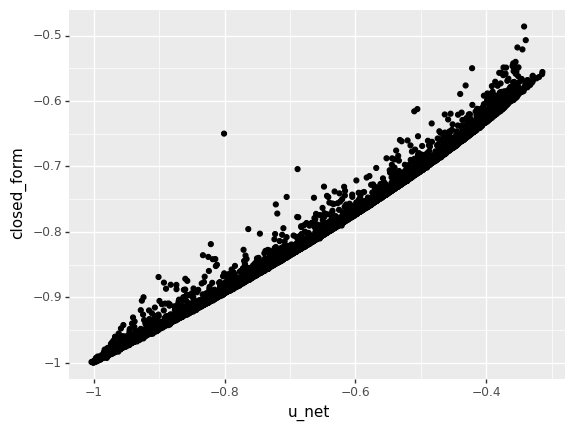

<ggplot: (8771365632705)>

time: 792 ms (started: 2022-07-15 17:45:01 +00:00)


In [70]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [71]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.028266504952936658

time: 5.27 ms (started: 2022-07-15 17:45:14 +00:00)


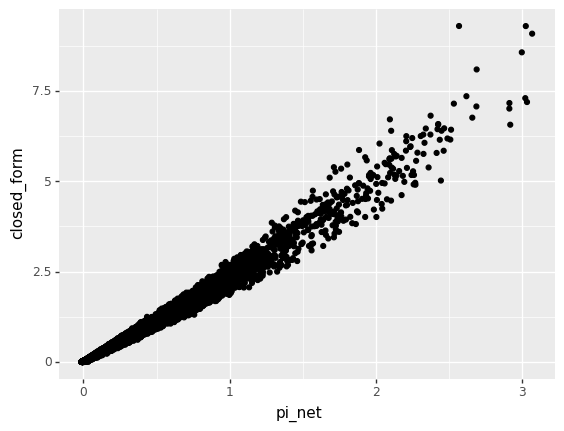

<ggplot: (8771365608573)>

time: 2.14 s (started: 2022-07-15 17:45:29 +00:00)


In [72]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [73]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.4794909014675908

time: 6.35 ms (started: 2022-07-15 17:45:40 +00:00)


### TrainHJBMertonWithDGMLB

In [32]:
class TrainHJBMertonWithDGMLB():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0
        self.stop_epoch = 0
        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5):
        
        if self.validation_sample is not None:
         self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3 ), dtype='float32') * np.nan
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[4000,8000,10000,20000], gamma=0.25)

        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        self.model.adapt_pi_epochs = True

        self.epoch_of_u = None
        self.adapt_pi_epochs = False
        self.start_adapt_epochs = [ [500, 1000, 2000, 5000], [4, 8, 10 ,20] ]
        self.was_loss_beaten = False

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0

            batch_size_used = self.BATCH_SIZE
            if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
             batch_size_used = self.BATCH_SIZE*2
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=batch_size_used)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=batch_size_used)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=batch_size_used)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

            optimizer.zero_grad()

            self.model.epoch_of_u = e
            # losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
            losses_L2, losses_ABS = loss_calc_method(sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False, util_network =self.net )
            # # pdb.set_trace()
            loss , internal , terminal  = losses_L2
            loss_abs , internal_abs , terminal_abs  = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))
                
            # pdb.set_trace()
            self.train_losses[e,:] = [ to_cpu_detach(loss), to_cpu_detach(internal), to_cpu_detach(terminal) ]
            #                           to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs), 
            #                           to_cpu_detach(losses_equalWeightedByType_abs)]

            if self.debug == True and (self.validation_sample is not None):
             losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                    loss_transforms = 
                                                                                                    [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                                                                                    keep_batch = False,
                                                                                                    util_network =self.net)
             validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                     *to_cpu_detach(losses_ABS_validation),
                                     *to_cpu_detach(losses_Huber_valiation)]
             validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
             self.validation_losses[e,:] = validation_loss_list
              # pdb.set_trace()
              # print(f"Epoch {e} - Pi Pred (0.47) {self.model.pi_net(self.validation_sample[0]).item()}")
            
            if self.use_early_stop or self.model.adapt_pi_epochs:
             loss_to_check = torch.mean(loss)
             if self.monitored_loss_type == "Train_L2":
               pass
             elif self.monitored_loss_type == "Train_L1":             
               loss_to_check = torch.mean(loss_abs)
             elif self.monitored_loss_type == "Train_MAXL2":             
               loss_to_check = max_loss_L2

             if loss_to_check < (self.best_loss-self.early_stop_delta):
               self.best_loss = loss_to_check
               if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
                 self.model.was_loss_beaten = False  # this was an increased batch for longer run, so we discount the loss here
                 if self.model.adapt_pi_epochs and e>(self.model.start_adapt_epochs[0][0]):
                   save_model_train(self, self.model, lr, eqLossFn, sample_method, self.best_loss, batch_size_used, e)  # but we still store it
               else:
                 self.model.was_loss_beaten = True
               self.early_stop_counter = 0
               # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
             else:
               self.early_stop_counter += 1
               self.model.was_loss_beaten = False
             if self.early_stop_counter>=self.early_stop_patience and self.use_early_stop:
               print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
               break
        
            loss_avg = loss_avg + float(loss.item())
            loss_int_avg = loss_int_avg + float(internal.item())
            loss.backward()

            optimizer.step()
            scheduler.step()
            i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
                
                #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
                #x_internal , x_terminal = sample_batch
                
                # pdb.set_trace()
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print(f"Epoch {e} - lr {lr} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print('internal loss:', internal , 'terminal loss:', terminal)

                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))
                # plot the fitted value function vs the closed form (ideally straight line...)
                #u_internal_sample = x_internal.clone()
                #mask = (u_internal_sample[:,0] > 0.1) & (u_internal_sample[:,4] > 0.1)
                #u_internal_sample = u_internal_sample[mask.reshape(-1),:]
                
                #gamma = 1
                #time = u_internal_sample[:,0].cpu().detach()
                #wealth = u_internal_sample[:,1].cpu().detach()
                #mu = u_internal_sample[:,2].cpu().detach()
                #r = u_internal_sample[:,3].cpu().detach()
                #sigma = u_internal_sample[:,4].cpu().detach()
                
                #u_internal_sample = Variable(u_internal_sample, requires_grad=True)
                #unet_preds = self.net(u_internal_sample)
                #du_dt, du_dx, d2u_dx2 = self.model.get_utility_function_derivatives(unet_preds, u_internal_sample)
                
                #pi_pred_example = self.model.pi_net(u_internal_sample.detach())
                
                #print('mean pi', pi_pred_example.mean(), 'max pi', pi_pred_example.max(), 'min pi', pi_pred_example.min())
                #print('mean d2u_dx2:', d2u_dx2.mean(),'max abs d2u_dx2:', torch.abs(d2u_dx2).max(), 'min abs d2u_dx2:', torch.abs(d2u_dx2).min())
                #print('mean du_dx:', du_dx.mean(),'max abs du_dx:', torch.abs(du_dx).max(), 'min abs du_dx:', torch.abs(du_dx).min())
                #print('mean du_dt:', du_dt.mean(),'max abs d2u_dx2:', torch.abs(du_dt).max(), 'min abs d2u_dx2:', torch.abs(du_dt).min())

                #u_net_results = unet_preds.detach().cpu().numpy().reshape(-1).tolist()
                #htx_results = self.Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
                #dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
                
                #print(ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point())
                
                #dataf = pd.DataFrame( { 'pi_net': self.model.pi_net(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                #       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )

                #print(ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point())
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                #self.history_tl.append( loss_avg )
                #self.history_internal.append( internal )
                #self.history_terminal.append( terminal )
                
                if self.debug == True and (self.validation_sample is not None):
                   mean = []
                   for l in self.hooks:
                       mean.append(torch.mean( self.hooks[l] ).item())
                   self.history_mean_hooks.append( mean )
                   xinternal, xterminal = self.validation_sample
                   xinternal_before, xinternal_expanded = attach_pi_used(xinternal, self.model.pi_net, requires_grad=False)
                   xterminal_before, xterminal_expanded = attach_pi_used(xterminal, self.model.pi_net, requires_grad=False)

                   xinternal_res = self.model.u_net(xinternal_expanded).detach()
                   xterminal_res = self.model.u_net(xterminal_expanded).detach()

                   # pdb.set_trace()
                   df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                   df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                   if self.history_surfaces_hooks is None:
                     self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                   else:
                     self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 3*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1), dtype='float32') * np.nan
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count])  

              # pdb.set_trace()
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method(sample_batch, 
                                                                       loss_transforms = [ key_loss_func, torch.abs ], 
                                                                       keep_batch = False )
              # if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
              #   pdb.set_trace()
              #   pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs ,losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                print('internal loss:', internal , 'terminal loss:', terminal)
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e


time: 1.04 s (started: 2022-07-15 08:44:27 +00:00)


### Test Case With DGMLB

In [ ]:
paper_name

'dgm_hjb'

time: 3.74 ms (started: 2022-07-14 09:12:48 +00:00)


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-3
# lr = 0.0005
# lr_for_pi = 0.0001
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net.to(torch.device("cuda:0"))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
mequation.MIN_SIGMA = 0.02
mequation.adapt_pi_epochs = True

# trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc = TrainHJBMertonWithDGMLB(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc.hook_interval = 400
trainMertonAlloc.use_early_stop = False
trainMertonAlloc.early_stop_patience = 1000

# trainMertonAlloc.train(epoch = 10000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)
trainMertonAlloc.train(epoch = 30000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

# trainMertonAlloc.train(epoch = 30000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 4/30000 [00:00<31:15, 15.99it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 13027.59375 - Internal Loss: 2784.109375 - Terminal Loss: 10243.484375


  1%|▏         | 402/30000 [00:27<36:21, 13.57it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 1558.7232666015625 - Internal Loss: 80.21135711669922 - Terminal Loss: 1478.5119094848633


  3%|▎         | 802/30000 [01:08<43:50, 11.10it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 610.5596923828125 - Internal Loss: 392.3910827636719 - Terminal Loss: 218.16860961914062


  4%|▍         | 1201/30000 [01:49<49:19,  9.73it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 554.0104370117188 - Internal Loss: 284.59503173828125 - Terminal Loss: 269.4154052734375


  5%|▌         | 1601/30000 [02:40<56:00,  8.45it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 431.6748962402344 - Internal Loss: 233.17233276367188 - Terminal Loss: 198.5025634765625


  7%|▋         | 2001/30000 [03:37<1:22:33,  5.65it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 478.87115478515625 - Internal Loss: 164.2908935546875 - Terminal Loss: 314.58026123046875


  8%|▊         | 2401/30000 [04:37<1:22:14,  5.59it/s]

Unet Epoch 2399 - lr 0.001 - Total Loss: 338.906494140625 - Internal Loss: 140.41664123535156 - Terminal Loss: 198.48985290527344


  9%|▉         | 2801/30000 [05:45<1:14:32,  6.08it/s]

Unet Epoch 2799 - lr 0.001 - Total Loss: 354.0301208496094 - Internal Loss: 168.908447265625 - Terminal Loss: 185.12167358398438


 11%|█         | 3201/30000 [07:03<1:19:16,  5.63it/s]

Unet Epoch 3199 - lr 0.001 - Total Loss: 263.59552001953125 - Internal Loss: 128.25015258789062 - Terminal Loss: 135.34536743164062


 12%|█▏        | 3601/30000 [08:25<1:25:09,  5.17it/s]

Unet Epoch 3599 - lr 0.001 - Total Loss: 281.5262145996094 - Internal Loss: 124.23271179199219 - Terminal Loss: 157.2935028076172


 13%|█▎        | 4000/30000 [09:51<1:30:59,  4.76it/s]

Unet Epoch 3999 - lr 0.001 - Total Loss: 264.71478271484375 - Internal Loss: 164.30076599121094 - Terminal Loss: 100.41401672363281


 15%|█▍        | 4400/30000 [11:31<1:36:43,  4.41it/s]

Unet Epoch 4399 - lr 0.001 - Total Loss: 222.95733642578125 - Internal Loss: 127.35536193847656 - Terminal Loss: 95.60197448730469


 16%|█▌        | 4800/30000 [13:13<1:42:40,  4.09it/s]

Unet Epoch 4799 - lr 0.001 - Total Loss: 237.7849884033203 - Internal Loss: 143.1201629638672 - Terminal Loss: 94.66482543945312


 17%|█▋        | 5200/30000 [15:00<1:50:45,  3.73it/s]

Unet Epoch 5199 - lr 0.001 - Total Loss: 205.38706970214844 - Internal Loss: 120.74579620361328 - Terminal Loss: 84.64127349853516


 19%|█▊        | 5600/30000 [16:59<1:52:22,  3.62it/s]

Unet Epoch 5599 - lr 0.001 - Total Loss: 246.81202697753906 - Internal Loss: 111.01091003417969 - Terminal Loss: 135.80111694335938


 20%|██        | 6000/30000 [19:02<2:35:43,  2.57it/s]

Unet Epoch 5999 - lr 0.001 - Total Loss: 179.0774688720703 - Internal Loss: 106.02627563476562 - Terminal Loss: 73.05119323730469


 21%|██▏       | 6400/30000 [21:14<2:12:02,  2.98it/s]

Unet Epoch 6399 - lr 0.001 - Total Loss: 206.6758575439453 - Internal Loss: 136.93228149414062 - Terminal Loss: 69.74357604980469


 23%|██▎       | 6800/30000 [23:33<2:30:00,  2.58it/s]

Unet Epoch 6799 - lr 0.001 - Total Loss: 186.6147918701172 - Internal Loss: 118.298095703125 - Terminal Loss: 68.31669616699219


 24%|██▍       | 7200/30000 [26:04<2:13:40,  2.84it/s]

Unet Epoch 7199 - lr 0.001 - Total Loss: 176.9439697265625 - Internal Loss: 108.2514877319336 - Terminal Loss: 68.6924819946289


 25%|██▌       | 7600/30000 [28:43<2:18:41,  2.69it/s]

Unet Epoch 7599 - lr 0.001 - Total Loss: 154.95556640625 - Internal Loss: 93.23722839355469 - Terminal Loss: 61.71833801269531


 27%|██▋       | 8000/30000 [31:29<2:22:45,  2.57it/s]

Unet Epoch 7999 - lr 0.001 - Total Loss: 167.8815460205078 - Internal Loss: 100.93333435058594 - Terminal Loss: 66.94821166992188


 28%|██▊       | 8400/30000 [34:24<2:25:13,  2.48it/s]

Unet Epoch 8399 - lr 0.001 - Total Loss: 186.901123046875 - Internal Loss: 130.109375 - Terminal Loss: 56.791748046875


 29%|██▉       | 8800/30000 [37:19<2:45:07,  2.14it/s]

Unet Epoch 8799 - lr 0.001 - Total Loss: 191.60400390625 - Internal Loss: 133.98509216308594 - Terminal Loss: 57.61891174316406


 31%|███       | 9200/30000 [40:18<2:30:36,  2.30it/s]

Unet Epoch 9199 - lr 0.001 - Total Loss: 152.18504333496094 - Internal Loss: 95.96128845214844 - Terminal Loss: 56.2237548828125


 32%|███▏      | 9600/30000 [43:26<2:37:59,  2.15it/s]

Unet Epoch 9599 - lr 0.001 - Total Loss: 154.48126220703125 - Internal Loss: 101.78992462158203 - Terminal Loss: 52.69133758544922


 33%|███▎      | 10000/30000 [46:56<2:47:59,  1.98it/s]

Unet Epoch 9999 - lr 0.001 - Total Loss: 157.5506134033203 - Internal Loss: 101.03849792480469 - Terminal Loss: 56.512115478515625


 35%|███▍      | 10400/30000 [50:25<2:55:51,  1.86it/s]

Unet Epoch 10399 - lr 0.001 - Total Loss: 180.3763885498047 - Internal Loss: 126.2582015991211 - Terminal Loss: 54.118186950683594


 36%|███▌      | 10800/30000 [53:59<2:46:02,  1.93it/s]

Unet Epoch 10799 - lr 0.001 - Total Loss: 152.28810119628906 - Internal Loss: 98.43525695800781 - Terminal Loss: 53.85284423828125


 37%|███▋      | 11200/30000 [58:10<2:52:00,  1.82it/s]

Unet Epoch 11199 - lr 0.001 - Total Loss: 165.93450927734375 - Internal Loss: 108.24508666992188 - Terminal Loss: 57.689422607421875


 39%|███▊      | 11600/30000 [1:02:15<2:54:00,  1.76it/s]

Unet Epoch 11599 - lr 0.001 - Total Loss: 145.63348388671875 - Internal Loss: 90.1426773071289 - Terminal Loss: 55.490806579589844


 40%|████      | 12000/30000 [1:06:12<2:55:41,  1.71it/s]

Unet Epoch 11999 - lr 0.001 - Total Loss: 167.1768341064453 - Internal Loss: 113.08858489990234 - Terminal Loss: 54.08824920654297


 41%|████▏     | 12400/30000 [1:10:18<2:55:20,  1.67it/s]

Unet Epoch 12399 - lr 0.001 - Total Loss: 138.83319091796875 - Internal Loss: 87.3193359375 - Terminal Loss: 51.51385498046875


 43%|████▎     | 12800/30000 [1:14:34<3:00:53,  1.58it/s]

Unet Epoch 12799 - lr 0.001 - Total Loss: 146.59152221679688 - Internal Loss: 98.18335723876953 - Terminal Loss: 48.408164978027344


 44%|████▍     | 13200/30000 [1:18:56<3:01:42,  1.54it/s]

Unet Epoch 13199 - lr 0.001 - Total Loss: 147.71139526367188 - Internal Loss: 95.98221588134766 - Terminal Loss: 51.72917938232422


 45%|████▌     | 13600/30000 [1:23:28<3:09:36,  1.44it/s]

Unet Epoch 13599 - lr 0.001 - Total Loss: 180.37875366210938 - Internal Loss: 133.06895446777344 - Terminal Loss: 47.30979919433594


 47%|████▋     | 14000/30000 [1:28:09<3:02:15,  1.46it/s]

Unet Epoch 13999 - lr 0.001 - Total Loss: 163.9929656982422 - Internal Loss: 104.77406311035156 - Terminal Loss: 59.218902587890625


 48%|████▊     | 14400/30000 [1:33:03<3:12:54,  1.35it/s]

Unet Epoch 14399 - lr 0.001 - Total Loss: 141.30245971679688 - Internal Loss: 90.11568450927734 - Terminal Loss: 51.18677520751953


 49%|████▉     | 14800/30000 [1:38:05<3:10:21,  1.33it/s]

Unet Epoch 14799 - lr 0.001 - Total Loss: 152.67813110351562 - Internal Loss: 104.51952362060547 - Terminal Loss: 48.158607482910156


 51%|█████     | 15200/30000 [1:43:16<3:17:40,  1.25it/s]

Unet Epoch 15199 - lr 0.001 - Total Loss: 144.07164001464844 - Internal Loss: 97.01690673828125 - Terminal Loss: 47.05473327636719


 52%|█████▏    | 15600/30000 [1:49:09<3:08:55,  1.27it/s]

Unet Epoch 15599 - lr 0.001 - Total Loss: 163.25074768066406 - Internal Loss: 105.74821472167969 - Terminal Loss: 57.502532958984375


 53%|█████▎    | 16000/30000 [1:55:11<3:09:31,  1.23it/s]

Unet Epoch 15999 - lr 0.001 - Total Loss: 159.48243713378906 - Internal Loss: 106.21500396728516 - Terminal Loss: 53.267433166503906


 55%|█████▍    | 16400/30000 [2:00:50<3:08:42,  1.20it/s]

Unet Epoch 16399 - lr 0.001 - Total Loss: 152.26821899414062 - Internal Loss: 97.89753723144531 - Terminal Loss: 54.37068176269531


 56%|█████▌    | 16800/30000 [2:06:41<3:07:27,  1.17it/s]

Unet Epoch 16799 - lr 0.001 - Total Loss: 151.81141662597656 - Internal Loss: 93.57579040527344 - Terminal Loss: 58.235626220703125


 57%|█████▋    | 17200/30000 [2:12:37<3:19:41,  1.07it/s]

Unet Epoch 17199 - lr 0.001 - Total Loss: 157.79078674316406 - Internal Loss: 102.75165557861328 - Terminal Loss: 55.03913116455078


 59%|█████▊    | 17600/30000 [2:19:13<3:20:51,  1.03it/s]

Unet Epoch 17599 - lr 0.001 - Total Loss: 179.00779724121094 - Internal Loss: 123.41920471191406 - Terminal Loss: 55.588592529296875


 60%|██████    | 18000/30000 [2:26:55<3:22:49,  1.01s/it]

Unet Epoch 17999 - lr 0.001 - Total Loss: 145.4193878173828 - Internal Loss: 93.001953125 - Terminal Loss: 52.41743469238281


 61%|██████▏   | 18400/30000 [2:33:46<3:15:05,  1.01s/it]

Unet Epoch 18399 - lr 0.001 - Total Loss: 154.4371795654297 - Internal Loss: 103.70848846435547 - Terminal Loss: 50.72869110107422


 63%|██████▎   | 18800/30000 [2:41:33<3:18:13,  1.06s/it]

Unet Epoch 18799 - lr 0.001 - Total Loss: 160.8562774658203 - Internal Loss: 103.94383239746094 - Terminal Loss: 56.912445068359375


 64%|██████▍   | 19200/30000 [2:49:28<3:13:28,  1.07s/it]

Unet Epoch 19199 - lr 0.001 - Total Loss: 150.18765258789062 - Internal Loss: 100.1849365234375 - Terminal Loss: 50.002716064453125


 65%|██████▌   | 19600/30000 [2:56:44<3:06:59,  1.08s/it]

Unet Epoch 19599 - lr 0.001 - Total Loss: 147.72947692871094 - Internal Loss: 89.69143676757812 - Terminal Loss: 58.03804016113281


 67%|██████▋   | 20000/30000 [3:04:10<3:05:02,  1.11s/it]

Unet Epoch 19999 - lr 0.001 - Total Loss: 171.17221069335938 - Internal Loss: 121.6423568725586 - Terminal Loss: 49.52985382080078


 68%|██████▊   | 20400/30000 [3:11:42<3:01:34,  1.13s/it]

Unet Epoch 20399 - lr 0.001 - Total Loss: 138.68240356445312 - Internal Loss: 84.81359100341797 - Terminal Loss: 53.868812561035156


 69%|██████▉   | 20800/30000 [3:19:19<2:57:50,  1.16s/it]

Unet Epoch 20799 - lr 0.001 - Total Loss: 141.6312255859375 - Internal Loss: 90.77307891845703 - Terminal Loss: 50.85814666748047


 71%|███████   | 21200/30000 [3:27:05<2:49:43,  1.16s/it]

Unet Epoch 21199 - lr 0.001 - Total Loss: 140.98648071289062 - Internal Loss: 87.97659301757812 - Terminal Loss: 53.0098876953125


 72%|███████▏  | 21600/30000 [3:35:00<2:44:52,  1.18s/it]

Unet Epoch 21599 - lr 0.001 - Total Loss: 161.0992889404297 - Internal Loss: 108.07929229736328 - Terminal Loss: 53.019996643066406


 73%|███████▎  | 22000/30000 [3:43:58<2:39:23,  1.20s/it]

Unet Epoch 21999 - lr 0.001 - Total Loss: 154.25778198242188 - Internal Loss: 98.57459259033203 - Terminal Loss: 55.683189392089844


 75%|███████▍  | 22400/30000 [3:52:01<2:26:29,  1.16s/it]

Unet Epoch 22399 - lr 0.001 - Total Loss: 142.759033203125 - Internal Loss: 100.43060302734375 - Terminal Loss: 42.32843017578125


 76%|███████▌  | 22800/30000 [4:00:02<2:21:56,  1.18s/it]

Unet Epoch 22799 - lr 0.001 - Total Loss: 158.1313018798828 - Internal Loss: 104.68701171875 - Terminal Loss: 53.44429016113281


 77%|███████▋  | 23200/30000 [4:08:16<2:40:48,  1.42s/it]

Unet Epoch 23199 - lr 0.001 - Total Loss: 154.95884704589844 - Internal Loss: 108.9329833984375 - Terminal Loss: 46.02586364746094


 79%|███████▊  | 23600/30000 [4:16:43<2:12:22,  1.24s/it]

Unet Epoch 23599 - lr 0.001 - Total Loss: 135.5161590576172 - Internal Loss: 85.18807220458984 - Terminal Loss: 50.328086853027344


 80%|████████  | 24000/30000 [4:25:13<2:10:01,  1.30s/it]

Unet Epoch 23999 - lr 0.001 - Total Loss: 126.18769073486328 - Internal Loss: 82.42388153076172 - Terminal Loss: 43.76380920410156


 81%|████████▏ | 24400/30000 [4:33:52<2:04:02,  1.33s/it]

Unet Epoch 24399 - lr 0.001 - Total Loss: 154.97584533691406 - Internal Loss: 107.06551361083984 - Terminal Loss: 47.91033172607422


 83%|████████▎ | 24800/30000 [4:42:39<1:54:46,  1.32s/it]

Unet Epoch 24799 - lr 0.001 - Total Loss: 149.23609924316406 - Internal Loss: 103.03262329101562 - Terminal Loss: 46.20347595214844


 84%|████████▍ | 25200/30000 [4:51:34<1:46:45,  1.33s/it]

Unet Epoch 25199 - lr 0.001 - Total Loss: 152.16323852539062 - Internal Loss: 98.87796020507812 - Terminal Loss: 53.2852783203125


 85%|████████▌ | 25600/30000 [5:00:39<1:39:29,  1.36s/it]

Unet Epoch 25599 - lr 0.001 - Total Loss: 148.6221160888672 - Internal Loss: 98.83834838867188 - Terminal Loss: 49.78376770019531


 87%|████████▋ | 26000/30000 [5:09:58<1:32:41,  1.39s/it]

Unet Epoch 25999 - lr 0.001 - Total Loss: 154.50306701660156 - Internal Loss: 100.44304656982422 - Terminal Loss: 54.060020446777344


 88%|████████▊ | 26400/30000 [5:19:23<1:24:50,  1.41s/it]

Unet Epoch 26399 - lr 0.001 - Total Loss: 137.3413543701172 - Internal Loss: 81.54224395751953 - Terminal Loss: 55.799110412597656


 89%|████████▉ | 26800/30000 [5:28:57<1:15:41,  1.42s/it]

Unet Epoch 26799 - lr 0.001 - Total Loss: 162.35935974121094 - Internal Loss: 112.66181945800781 - Terminal Loss: 49.697540283203125


 91%|█████████ | 27200/30000 [5:38:41<1:07:08,  1.44s/it]

Unet Epoch 27199 - lr 0.001 - Total Loss: 147.12693786621094 - Internal Loss: 93.33695983886719 - Terminal Loss: 53.78997802734375


 92%|█████████▏| 27600/30000 [5:48:30<58:40,  1.47s/it]

Unet Epoch 27599 - lr 0.001 - Total Loss: 134.0160675048828 - Internal Loss: 87.61524200439453 - Terminal Loss: 46.40082550048828


 93%|█████████▎| 28000/30000 [5:58:29<51:45,  1.55s/it]

Unet Epoch 27999 - lr 0.001 - Total Loss: 141.88987731933594 - Internal Loss: 92.62975311279297 - Terminal Loss: 49.26012420654297


 95%|█████████▍| 28400/30000 [6:08:42<44:05,  1.65s/it]

Unet Epoch 28399 - lr 0.001 - Total Loss: 158.29954528808594 - Internal Loss: 108.44734191894531 - Terminal Loss: 49.852203369140625


 96%|█████████▌| 28800/30000 [6:19:08<31:03,  1.55s/it]

Unet Epoch 28799 - lr 0.001 - Total Loss: 136.99862670898438 - Internal Loss: 87.7160415649414 - Terminal Loss: 49.28258514404297


 97%|█████████▋| 29200/30000 [6:29:45<22:14,  1.67s/it]

Unet Epoch 29199 - lr 0.001 - Total Loss: 143.71241760253906 - Internal Loss: 94.37786102294922 - Terminal Loss: 49.334556579589844


 99%|█████████▊| 29600/30000 [6:40:37<10:46,  1.62s/it]

Unet Epoch 29599 - lr 0.001 - Total Loss: 158.95474243164062 - Internal Loss: 106.0416488647461 - Terminal Loss: 52.91309356689453


100%|██████████| 30000/30000 [6:52:59<00:00,  1.21it/s]

Unet Epoch 29999 - lr 0.001 - Total Loss: 136.41238403320312 - Internal Loss: 83.30975341796875 - Terminal Loss: 53.102630615234375
time: 6h 52min 59s (started: 2022-07-13 23:27:41 +00:00)


In [ ]:
# save_model_final(training, eqObject, lr, eqLossFn, sample_method, batch_size)
save_model_final(trainMertonAlloc, mequation, lr, eqLossFn , sample_method, 2048)

time: 122 ms (started: 2022-07-14 06:20:40 +00:00)


In [ ]:
# load up the data

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-3
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net.to(torch.device("cuda:0"))

u_net.load_state_dict(torch.load(os.path.join(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", 
                                              'MertonEquation_20220714062040_2048_calculateLoss_U_0p001_U64_U2_P64_P2_U')))

pi_net.load_state_dict(torch.load(os.path.join(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", 
                                              'MertonEquation_20220714062040_2048_calculateLoss_U_0p001_U64_U2_P64_P2_P')))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
mequation.MIN_SIGMA = 0.02
mequation.adapt_pi_epochs = True

# trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc = TrainHJBMertonWithDGMLB(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc.hook_interval = 400
trainMertonAlloc.use_early_stop = False
trainMertonAlloc.early_stop_patience = 1000



time: 35.1 ms (started: 2022-07-14 17:06:57 +00:00)


In [ ]:
######## Only train PI from now ?
from pprint import pprint as pp

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=10, to_cpu=False)
internal_sample.requires_grad = True

# internal_sample = internal_sample[internal_sample[:,4] > 0.2] 
# terminal_sample = terminal_sample[terminal_sample[:,4] > 0.2]

u_net_val = u_net(internal_sample)
#print(torch.mean(u_net_val), torch.min(u_net_val), torch.max(u_net_val))

du = torch.autograd.grad( u_net_val, 
                          internal_sample,
                          grad_outputs=torch.ones_like(u_net_val),
                          create_graph=True)


du_dt = du[0][:,0].reshape(-1,1)
du_dx = du[0][:,1].reshape(-1,1) 
# du_dx.requires_grad=True
# du[0].requires_grad = True
pp(du_dx)
# pp(du[0])
# du_dx.backward(torch.ones_like(du_dx))

d2u_dx2 = torch.autograd.grad(du_dx, 
                              internal_sample , 
                              grad_outputs=torch.ones_like(du_dx),
                              allow_unused=False,
                              create_graph=False, 
                              )[0][:,1].reshape(-1,1)

pp(d2u_dx2)

pi_model = PiEquation(pi_net, du_dx.detach(), d2u_dx2.detach())
pi_model.curr_epoch = 0

pi_net_epoch = 2000
pi_trainer = TrainInternalPiWithDGM(mequation, pi_model, 
                                    internal_sample.shape[0], 
                                    pi_net_epoch, 
                                    lr_for_pi, 
                                    debug=True, 
                                    loss_multiply=1.0)
pi_trainer.print = True
pi_trainer.use_early_stop = True
pi_trainer.early_stop_patience = 3 # min(10,math.ceil(pi_net_epoch/2.0))        
pi_trainer.train(sample_batch=(internal_sample, terminal_sample))

# 


# du_dt, du_dx, d2u_dx2 = mequation.get_utility_function_derivatives(u_net_val, internal_sample)
#print('Unet derivatives shape:', du_dt.shape, du_dx.shape, d2u_dx2.shape)



tensor([[0.9976],
        [0.4905],
        [0.7303],
        [0.6100],
        [0.1629],
        [0.7977],
        [1.0736],
        [0.4706],
        [0.5782],
        [0.6734]], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
tensor([[-0.9572],
        [-1.3354],
        [-0.8237],
        [-0.6155],
        [-0.2930],
        [-0.6671],
        [-2.5934],
        [-0.4897],
        [-0.6296],
        [-0.7691]], device='cuda:0')
Pi Net Epoch 0 Loss -568.31598
Pi Net Epoch 1 Loss -582.03052
Pi Net Epoch 2 Loss -600.52551
Pi Net Epoch 3 Loss -616.74921
Pi Net Epoch 4 Loss -629.9671
Pi Net Epoch 5 Loss -640.10193
Pi Net Epoch 6 Loss -640.65381
Pi Net Epoch 7 Loss -629.96051
Pi Net Epoch 8 Loss -629.27179
Pi Net Epoch 9 Loss -637.45679
Pi Net Epoch 10 Loss -644.13055
Pi Net Epoch 11 Loss -647.11975
Pi Net Epoch 12 Loss -647.88544
Pi Net Epoch 13 Loss -647.39844
Pi Net Epoch 14 Loss -646.4989
Pi Net Epoch 15 Loss -646.01501
Pi Net Epoch 16 Loss -646.15063
Pi Net Epoch 17 Loss -646.515

In [ ]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.detach().reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1), requires_grad=requires_grad)
  return before_x, new_x

time: 3.65 ms (started: 2022-07-14 17:11:01 +00:00)


List of params for successfull run



*   Loss = L1
*   Util Net + piNet: depth = 3, NN= 50
*   lr = 0.005
*   lr_for_pi = 0.002
*   max_pi_epochs = 5
*   trainMertonAlloc.use_early_stop = False
*   epoch = 6100
*   loss weights = 1\*intC + 1\*terminal







In [ ]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

time: 3.19 ms (started: 2022-07-14 17:11:04 +00:00)


In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI
gamma = 1
internal_sample, terminal_sample = mequation.sample(size=10000, to_cpu=False)

# internal_sample = internal_sample[internal_sample[:,4] > 0.2] 
# terminal_sample = terminal_sample[terminal_sample[:,4] > 0.2]
  #mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
  #internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 8.95 ms (started: 2022-07-14 17:13:06 +00:00)


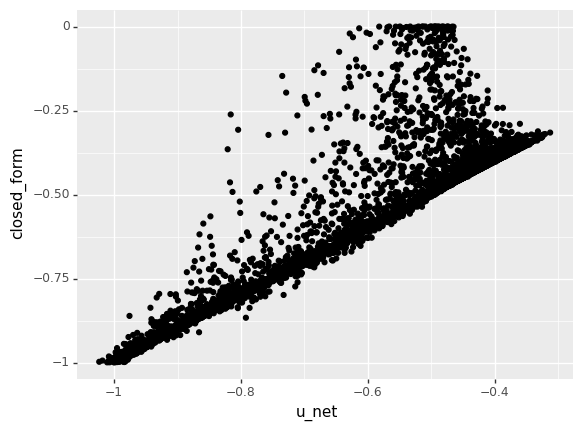

<ggplot: (8730080825941)>

time: 618 ms (started: 2022-07-14 17:13:08 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:

np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.006215690416673808

time: 13.2 ms (started: 2022-07-14 17:13:12 +00:00)


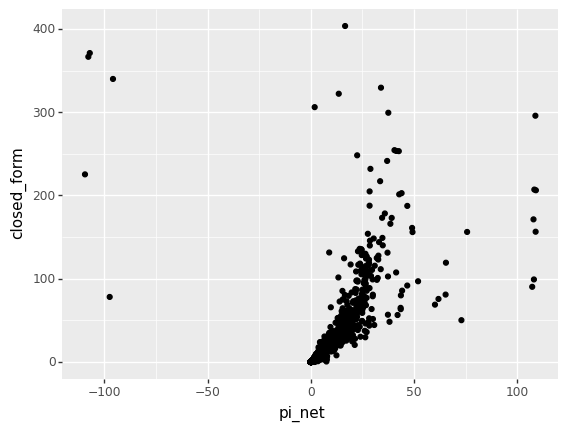

<ggplot: (8730083229341)>

time: 1.13 s (started: 2022-07-14 17:13:13 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.8027012078308436

time: 19.3 ms (started: 2022-07-14 11:08:03 +00:00)


In [ ]:
# keeping the value net fixed and optimizing just the control net!!!




### With KL Gamma 

### Unused

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/DGM'

Mounted at /content/drive
time: 24 s (started: 2022-07-08 14:30:39 +00:00)


In [ ]:
#torch.save(trainMertonAlloc.net.state_dict(), os.path.join(filepath, 'unet_trained_15k_epochs.pt'))
#torch.save(mequation.pi_net.state_dict(), os.path.join(filepath, 'pi_net_trained_15k_epochs_4ep.pt'))

time: 14.2 ms (started: 2022-07-08 07:19:57 +00:00)


In [ ]:
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.load_state_dict(torch.load(os.path.join(filepath, 'unet_trained_15k_epochs.pt')))

<All keys matched successfully>

time: 589 ms (started: 2022-07-08 14:31:30 +00:00)


In [ ]:
u_net.to('cuda:0')

MertonUtilityNet(
  (fc_input): Linear(in_features=5, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 4.95 ms (started: 2022-07-08 14:31:57 +00:00)


In [ ]:
mequation = MertonEquation(MertonUtilityNet( NL = 1 , NN = 3 ), MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 100, depth=5 ), 1, 10000.0)
# val_sample_to_use = tuple([ x.cpu().detach() for x in mequation.sample(sample_method_X="U", size=1) ] )
val_sample_to_use = mequation.sample(sample_method_X="U", size=1) 
# # gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   
val_sample_to_use[0][0,0] = 0.0
val_sample_to_use[0][0,2] = 0.05
val_sample_to_use[0][0,3] = 0.02
val_sample_to_use[0][0,4] = 0.25

In [ ]:
import torch

def u(q):
  x = q[:,1]
  y = q[:, 0]
  return x**2 + y**2
x = torch.randn(3, requires_grad=True)
t = torch.randn(3, requires_grad=True)
u_val = u(torch.cat((x, t), axis=1))

print(x,t,u_val)
print(torch.cat((t,x)))
# 1st derivatives
dt = torch.autograd.grad(u_val, x, grad_outputs=torch.ones_like(u_val), create_graph=True, allow_unused=True)
print(dt[0])
dt = torch.autograd.grad(u_val.sum(), torch.cat((t,x)), create_graph=True)
print(dt[0])
dx = torch.autograd.grad(u_val.sum(), x, create_graph=True)[0]

# 2nd derivatives (higher orders require `create_graph=True`)
ddx = torch.autograd.grad(dx.sum(), x)[0]
ddx

In [ ]:
!nvidia-smi

In [ ]:
2+2

4